# 12.1 Bar Plot


In [2]:
library(DOSE)
data(geneList)
de <- names(geneList)[abs(geneList) > 2]


DOSE v3.14.0  For help: https://guangchuangyu.github.io/software/DOSE

If you use DOSE in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Guang-Rong Yan, Qing-Yu He. DOSE: an R/Bioconductor package for Disease Ontology Semantic and Enrichment analysis. Bioinformatics 2015, 31(4):608-609



In [3]:
packageVersion("DOSE")

[1] ‘3.14.0’

In [4]:
# packageVersion("BiocGenerics")
# packageVersion("AnnotationDbi")
# packageVersion("GSEABase")
# packageVersion("org.Hs.eg.db")
# packageVersion("vroom")
# packageVersion("msigdbr")
# packageVersion("DOSE")
# packageVersion("pathview")
# packageVersion("clusterProfiler")
# packageVersion("clusterProfiler.dplyr")
# packageVersion("enrichplot")


In [5]:
edo <- enrichDGN(de)

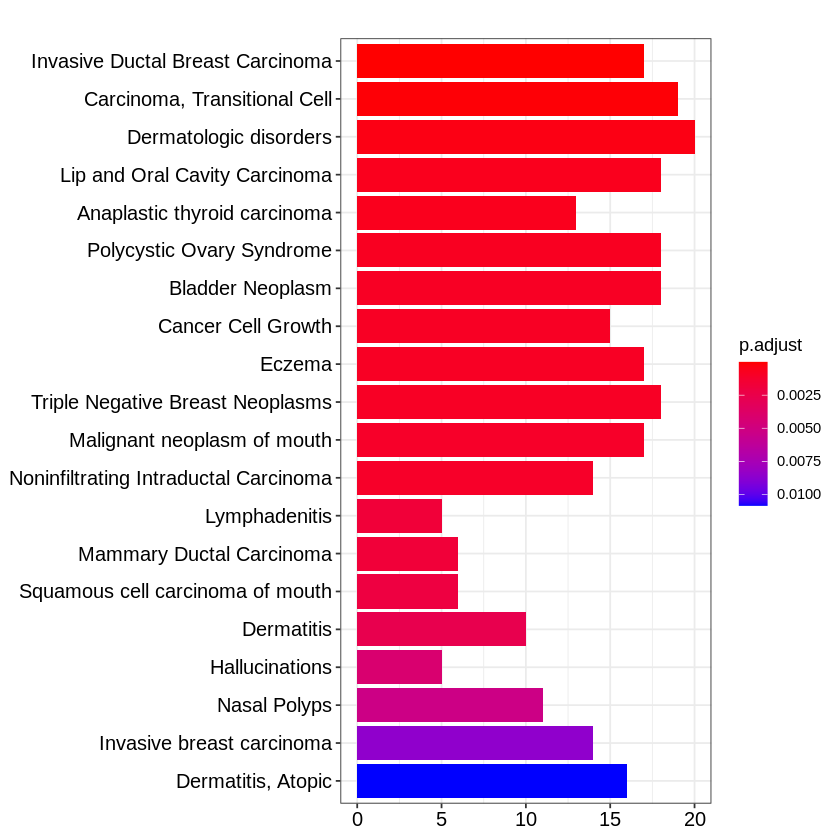

In [6]:
library(enrichplot)
barplot(edo, showCategory=20)

In [7]:
str(geneList)
packageVersion("fgsea")

 Named num [1:12495] 4.57 4.51 4.42 4.14 3.88 ...
 - attr(*, "names")= chr [1:12495] "4312" "8318" "10874" "55143" ...


[1] ‘1.14.0’

# 12.2 Dot plot


In [8]:
edo2 <- gseNCG(geneList, pvalueCutoff = 0.5,  nPerm=10000)

preparing geneSet collections...
GSEA analysis...
Warning message in .GSEA(geneList = geneList, exponent = exponent, minGSSize = minGSSize, :
“We do not recommend using nPerm parameter incurrent and future releases”Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
“You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call.”leading edge analysis...
done...


In [9]:
head(edo2)

ID            Description   setSize enrichmentScore NES      
liver         liver         liver          45     -0.4733762      -1.545994
bladder       bladder       bladder        61     -0.4134155      -1.429950
lung          lung          lung          115     -0.3556788      -1.364355
head_and_neck head_and_neck head_and_neck  68     -0.3944769      -1.393551
prostate      prostate      prostate       46     -0.4236662      -1.391704
esophageal    esophageal    esophageal     44     -0.4272198      -1.389539
              pvalue     p.adjust qvalues   rank leading_edge                  
liver         0.01664744 0.244064 0.2247958 3138 tags=44%, list=25%, signal=33%
bladder       0.03195610 0.244064 0.2247958 2841 tags=44%, list=23%, signal=34%
lung          0.03195739 0.244064 0.2247958 2775 tags=31%, list=22%, signal=25%
head_and_neck 0.04243484 0.244064 0.2247958 2864 tags=38%, list=23%, signal=30%
prostate      0.05927750 0.244064 0.2247958 3170 tags=48%, list=25%, signal=36%
esophageal    0.05937810 0.244064 0.2247958 2636 tags=30%, list=21%, signal=23%
              core_enrichment                                                                                                                                                                             
liver         7249/472/1571/4297/8289/9611/5925/22861/1499/7157/2186/595/7248/11059/7769/273/1657/29994/213/125                                                                                           
bladder       7403/287/463/472/4297/2065/2262/8289/9611/5925/2068/4763/7157/2186/1387/3910/2261/7248/23037/23345/7832/79633/10628/22906/388/4036/3169                                                     
lung          5287/29072/92552/53353/8019/8289/3624/5925/107/201229/4763/1499/7157/23314/6794/9811/29119/3791/1301/2322/324/23284/2261/4685/22982/187/9353/2042/862/51364/79776/2737/63923/57088/1602/2066
head_and_neck 9379/5287/79161/8502/5286/80230/8626/5921/3664/113791/7157/55190/9947/5295/7248/4208/1278/7048/221981/89795/23345/79776/9369/55821/2045/64084                                               
prostate      463/472/4297/11280/1105/8405/8289/9611/5925/54894/1499/7157/5295/1027/2078/324/595/10142/2045/7704/367/3169                                                                                 
esophageal    23077/8289/55614/5925/7157/1387/23111/5243/23345/9037/9891/5101/25893

In [10]:
p1 <- dotplot(edo, showCategory=30) + ggtitle("dotplot for ORA")

In [11]:
p2 <- dotplot(edo2, showCategory=30) + ggtitle("dotplot for GSEA")

In [12]:
library(repr)

# Change plot size to 4 x 3
options(repr.plot.width=16, repr.plot.height=8)

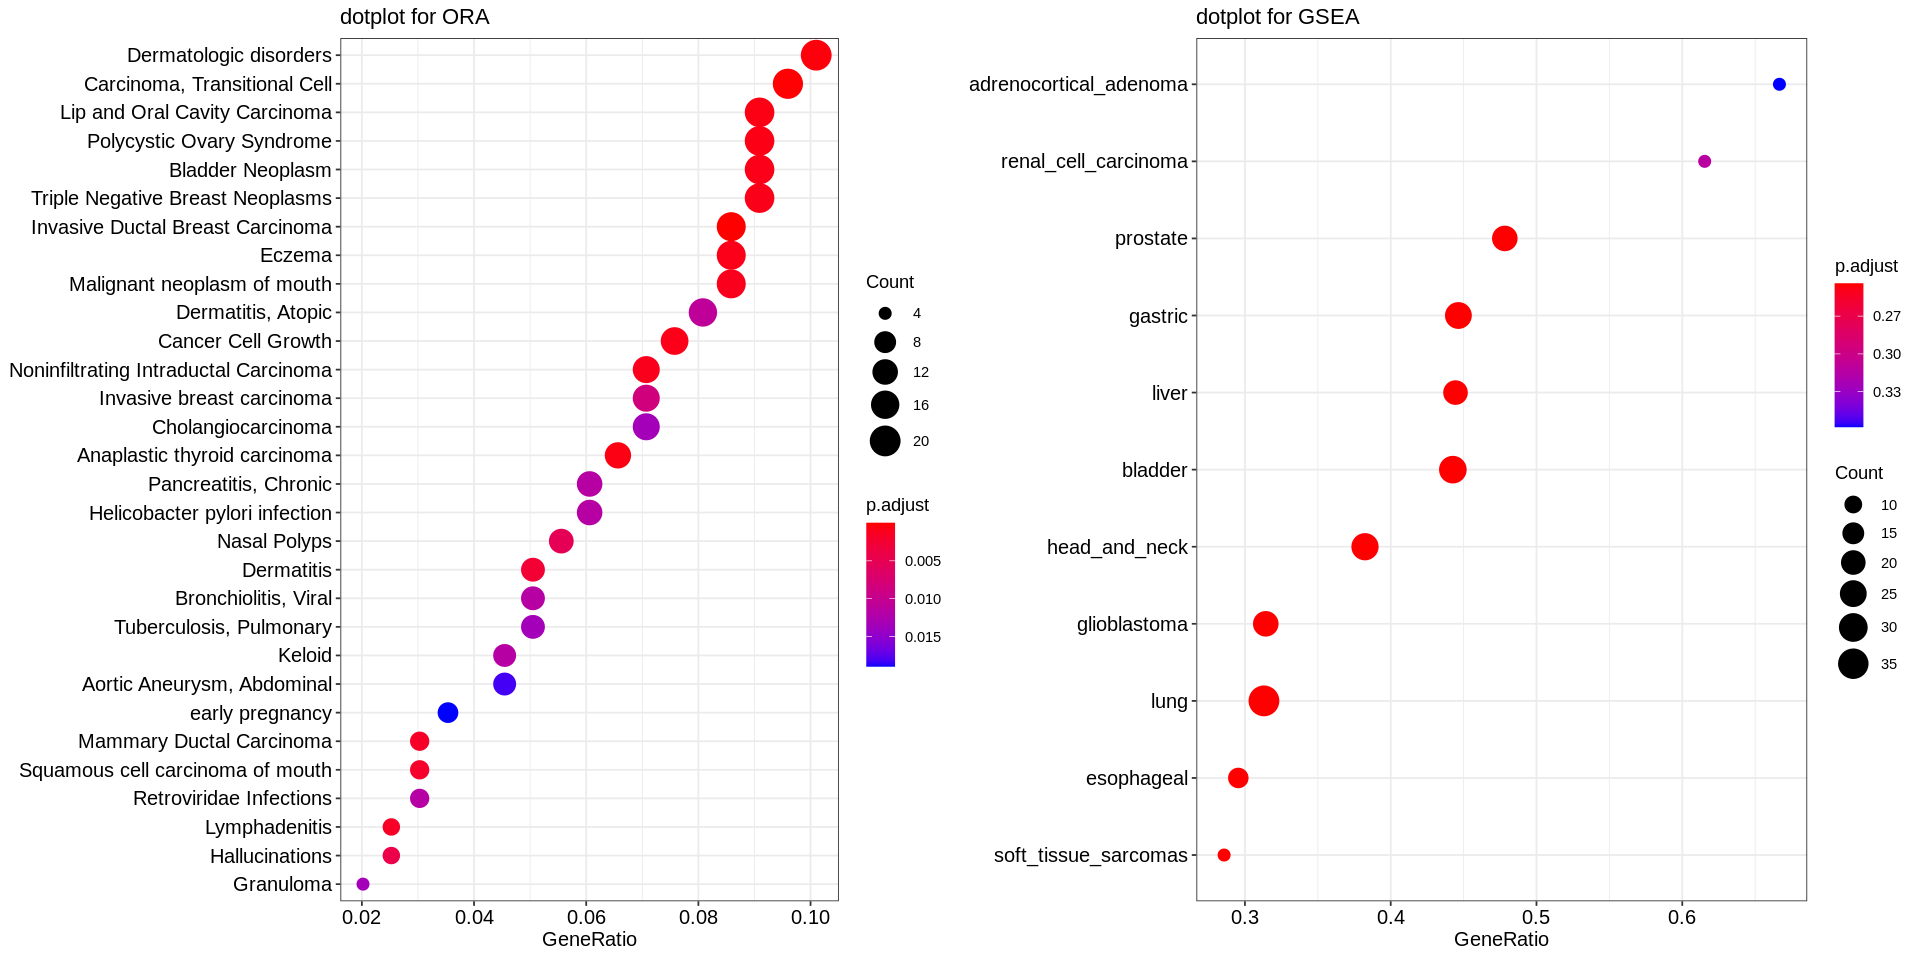

In [13]:
plot_grid(p1, p2, ncol=2)

In [14]:
## convert gene ID to Symbol
edox <- setReadable(edo, 'org.Hs.eg.db', 'ENTREZID')
p1 <- cnetplot(edox, foldChange=geneList)
## categorySize can be scaled by 'pvalue' or 'geneNum'
p2 <- cnetplot(edox, categorySize="pvalue", foldChange=geneList)
p3 <- cnetplot(edox, foldChange=geneList, circular = TRUE, colorEdge = TRUE)

Loading required package: org.Hs.eg.db
Loading required package: AnnotationDbi
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min

Lo

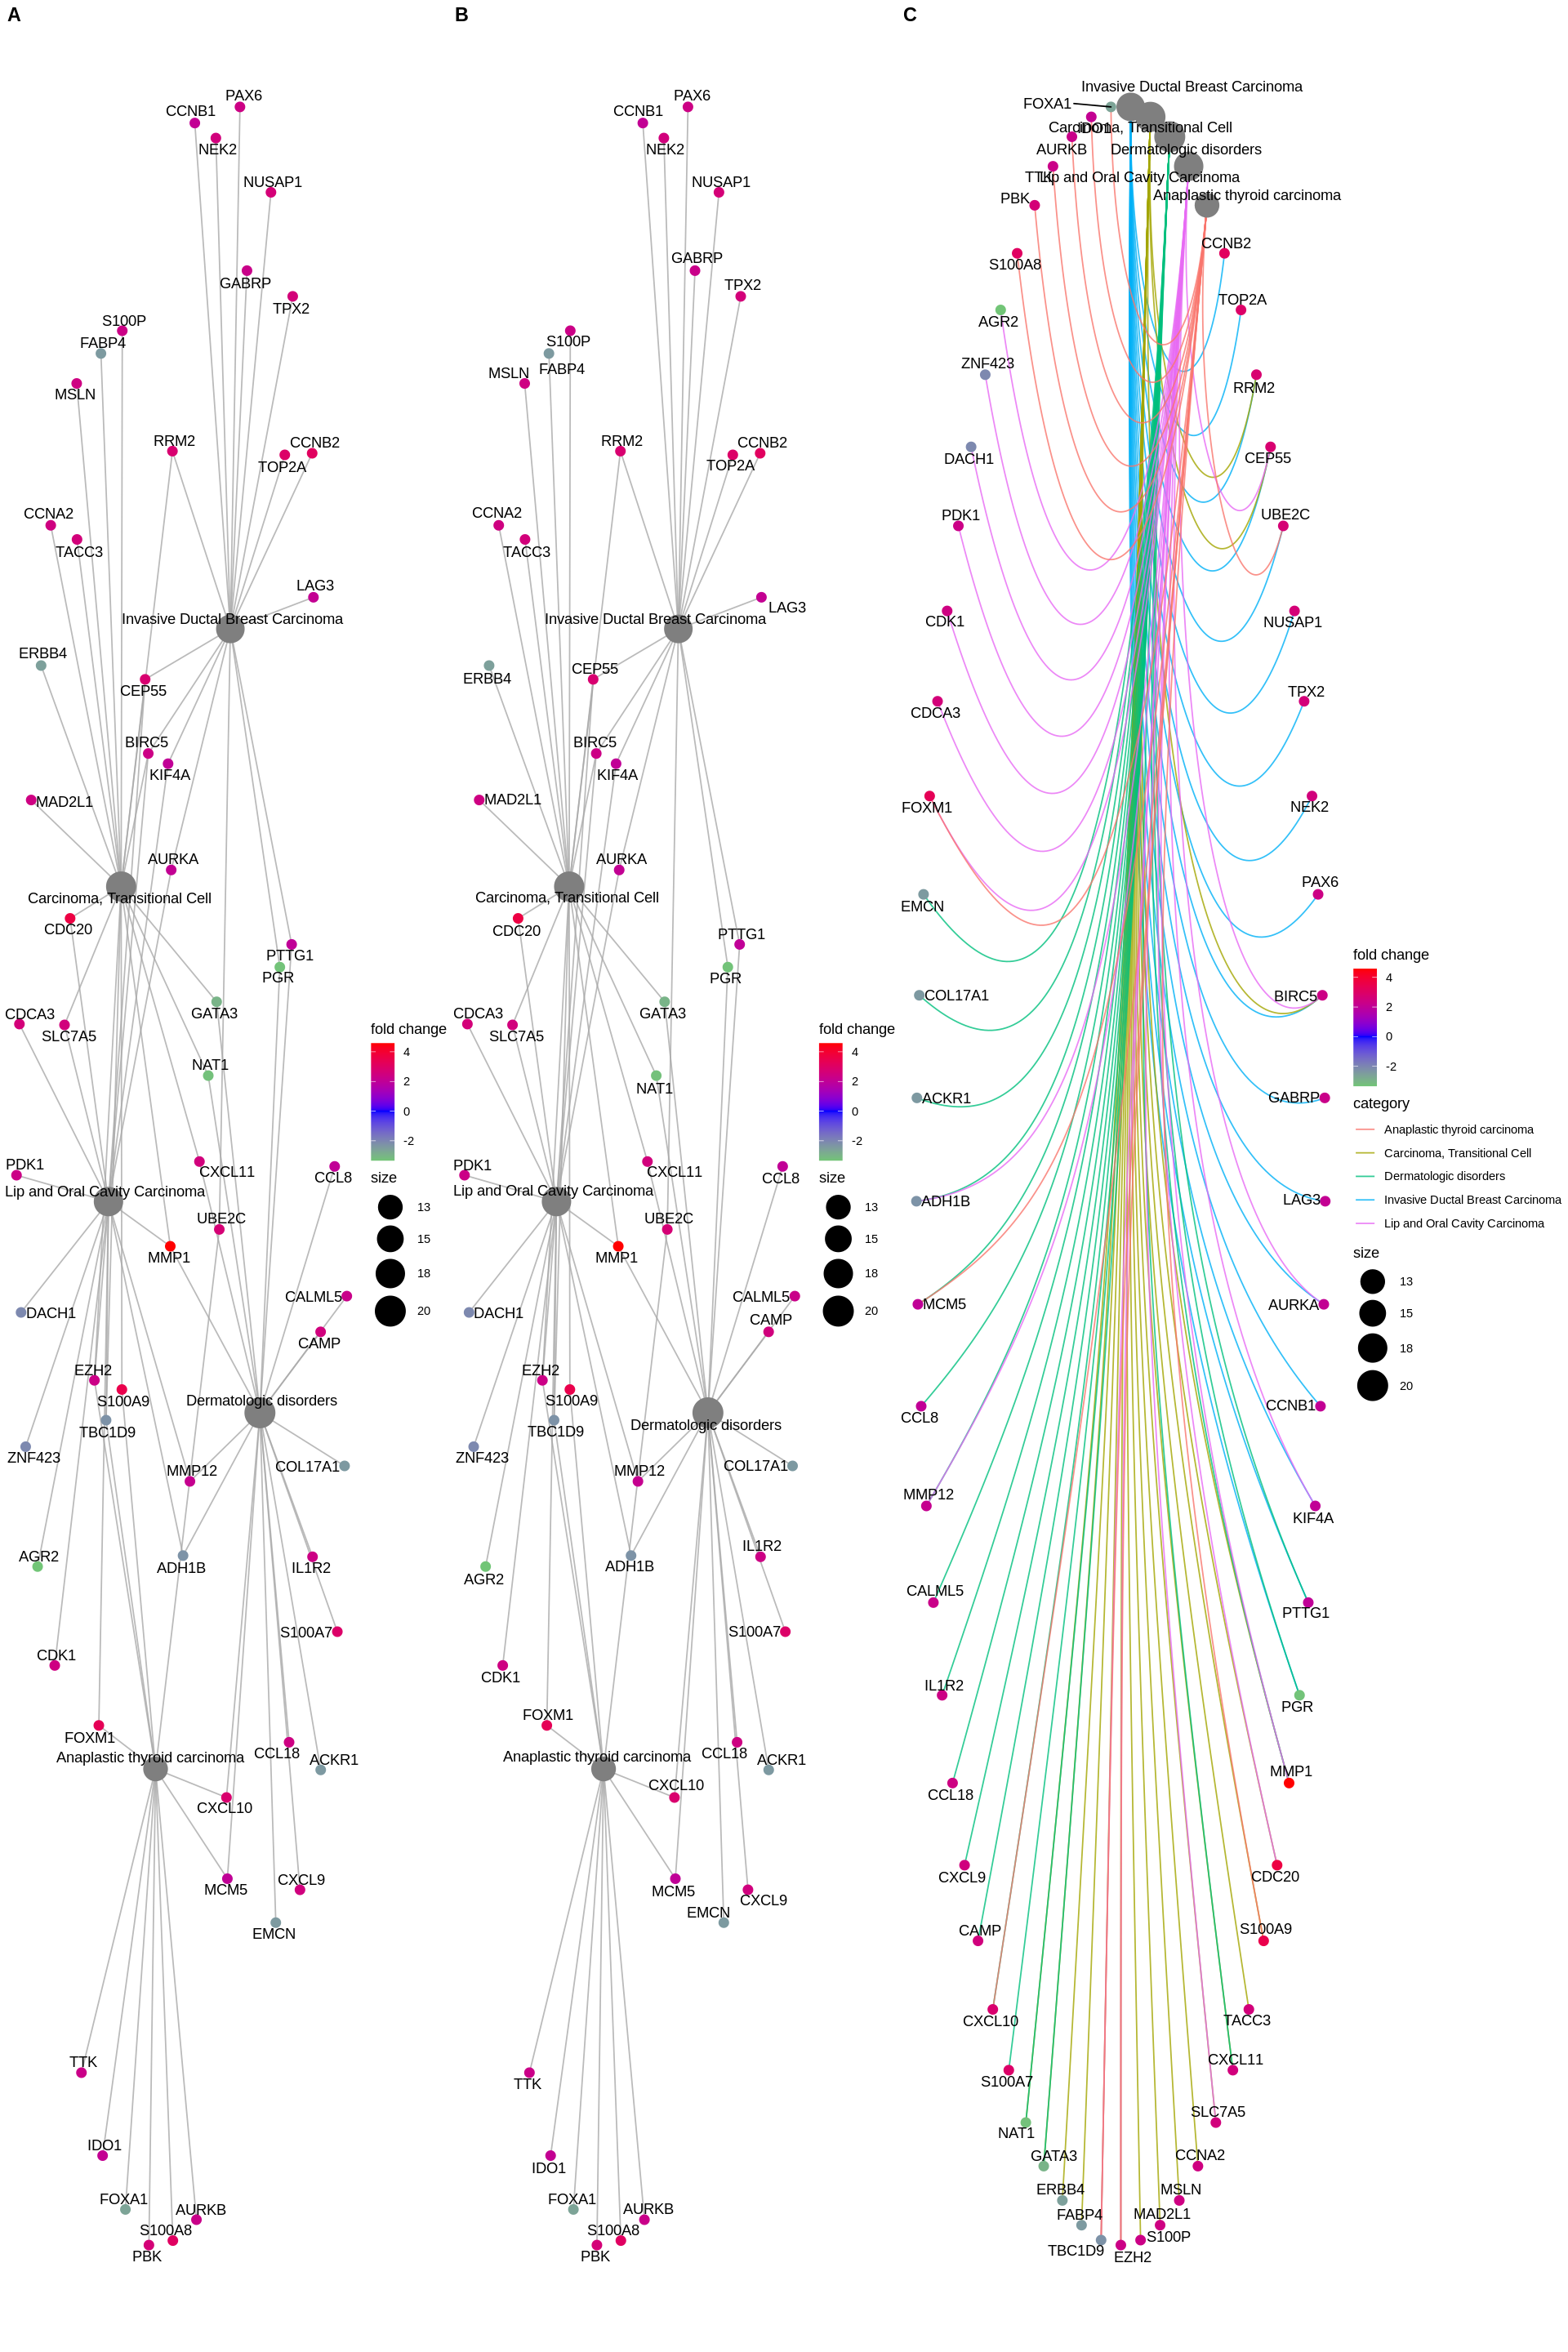

In [15]:
options(repr.plot.width=16, repr.plot.height=24)

cowplot::plot_grid(p1, p2, p3, ncol=3, labels=LETTERS[1:3], rel_widths=c(.8, .8, 1.2))

something wrong with this. 

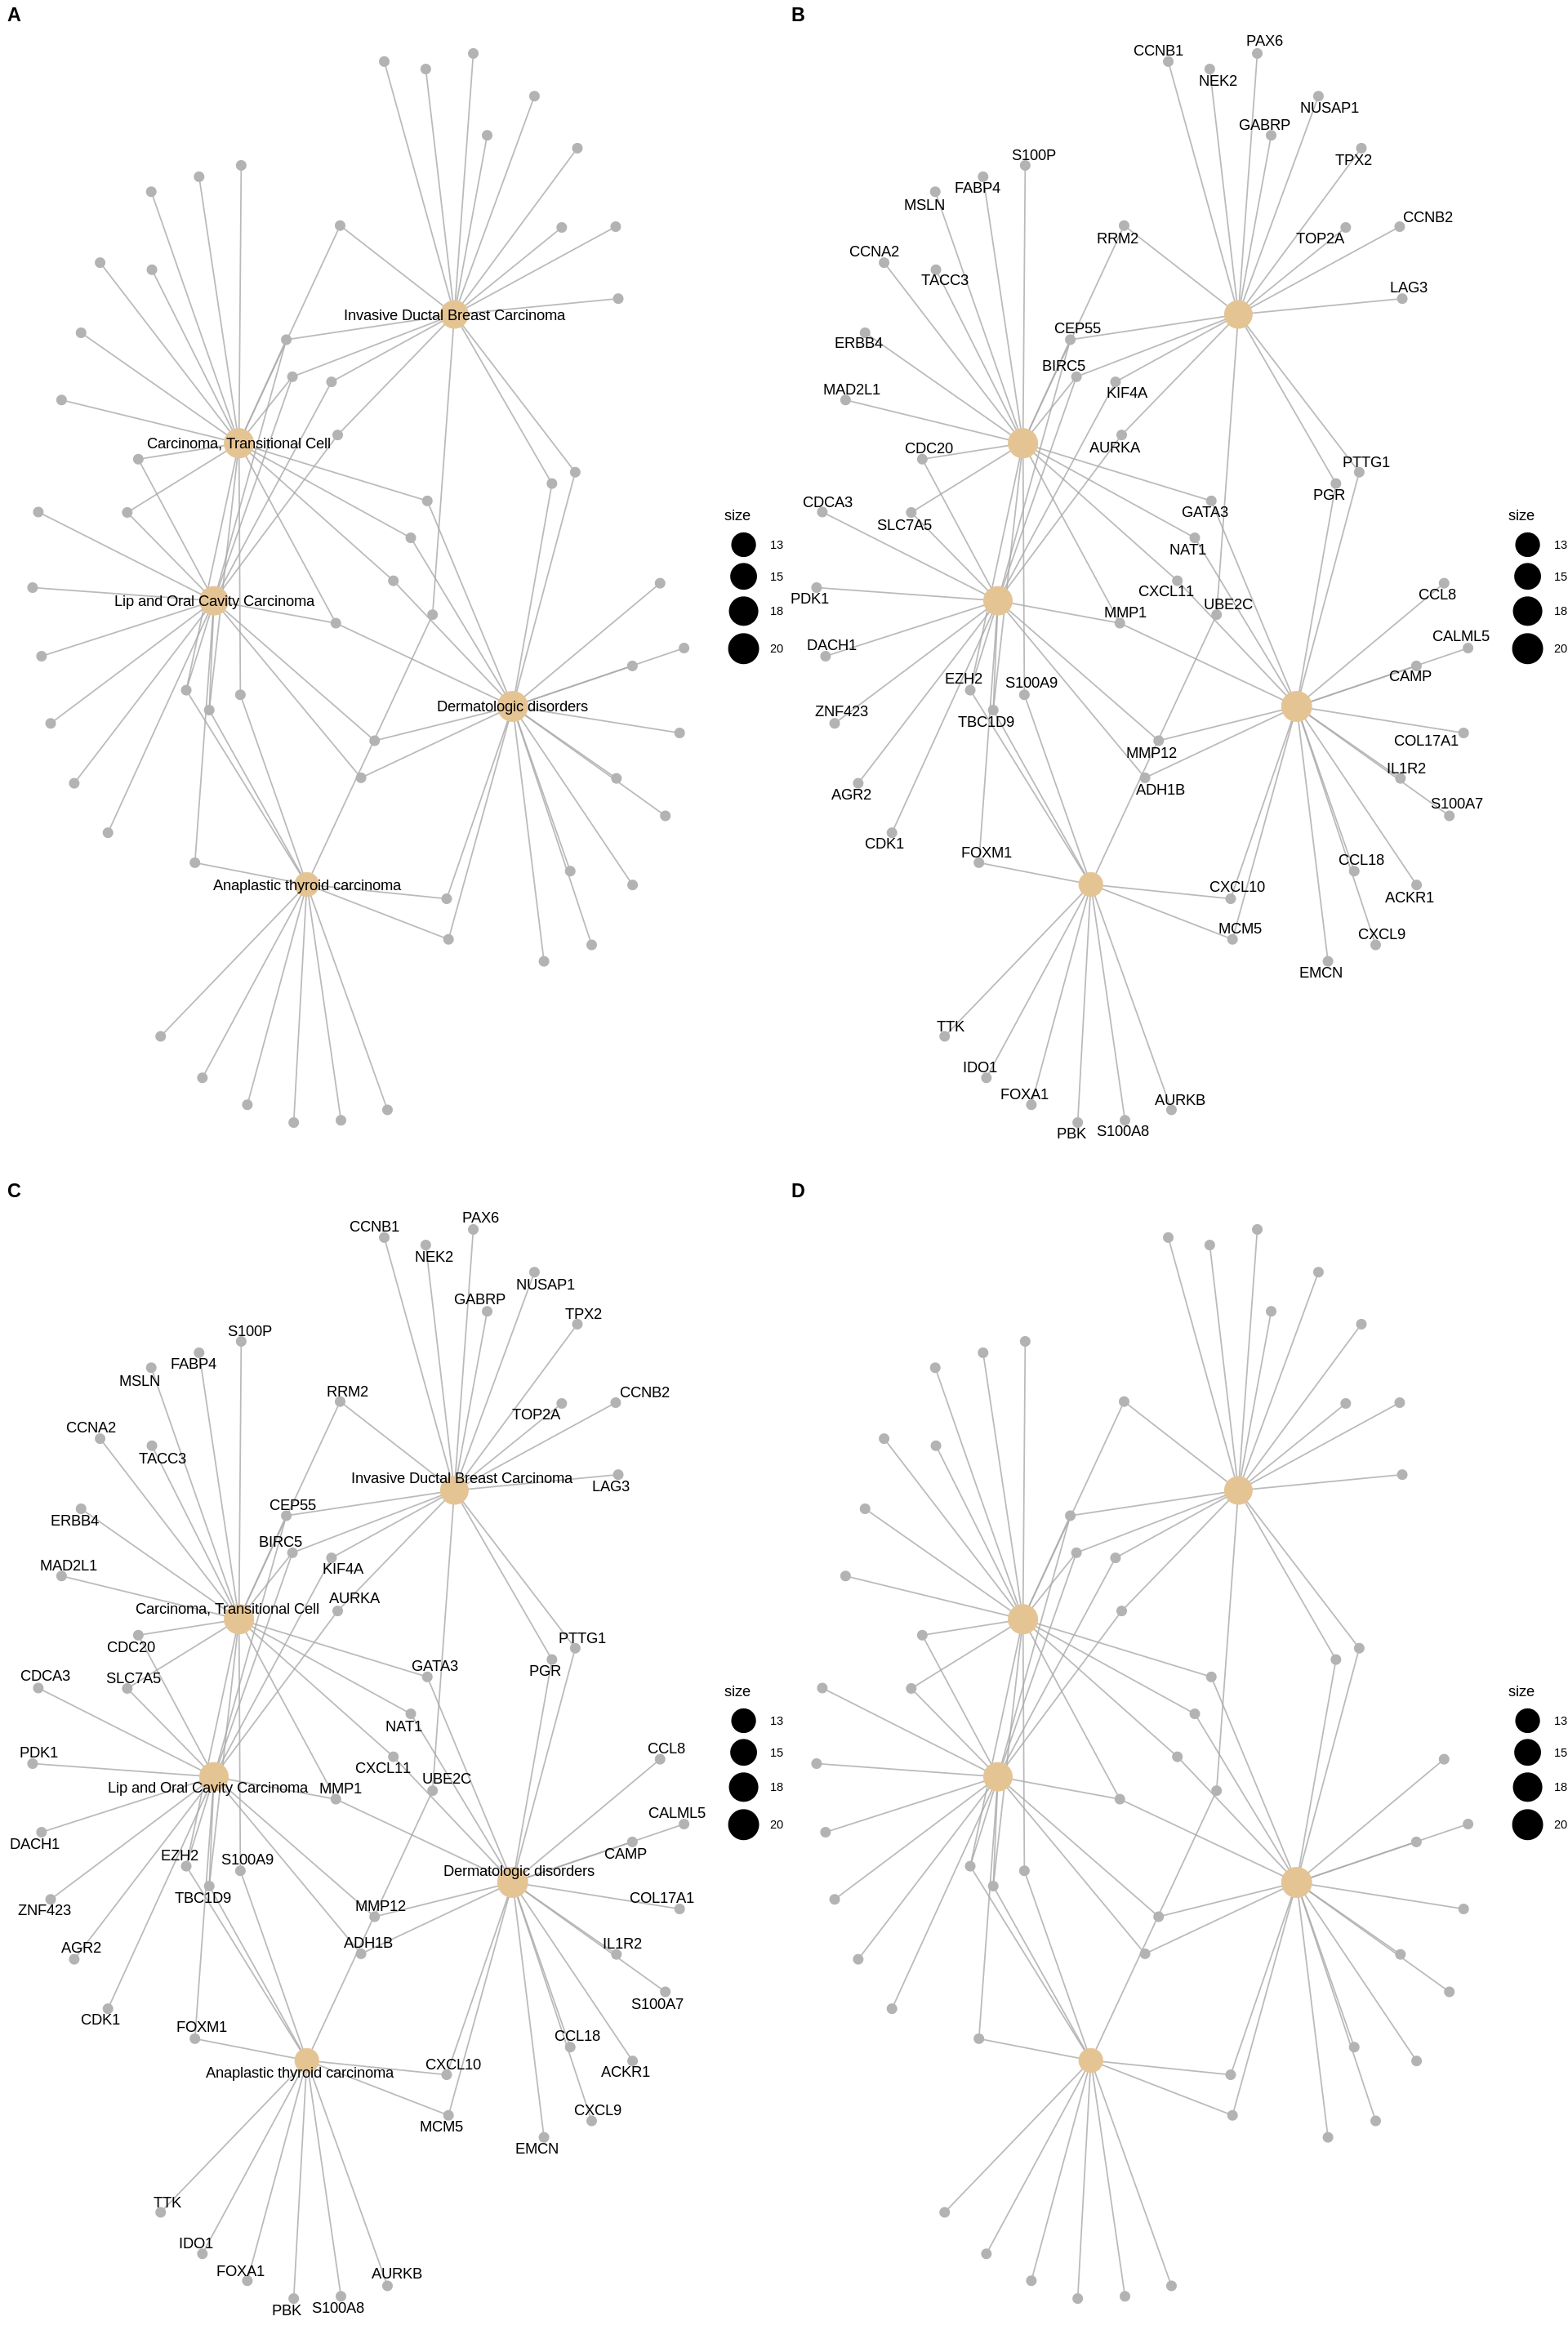

In [16]:
p1 <- cnetplot(edox, node_label="category") 
p2 <- cnetplot(edox, node_label="gene") 
p3 <- cnetplot(edox, node_label="all") 
p4 <- cnetplot(edox, node_label="none") 
cowplot::plot_grid(p1, p2, p3, p4, ncol=2, labels=LETTERS[1:4])

# 12.4 Heatmap-like functional classification


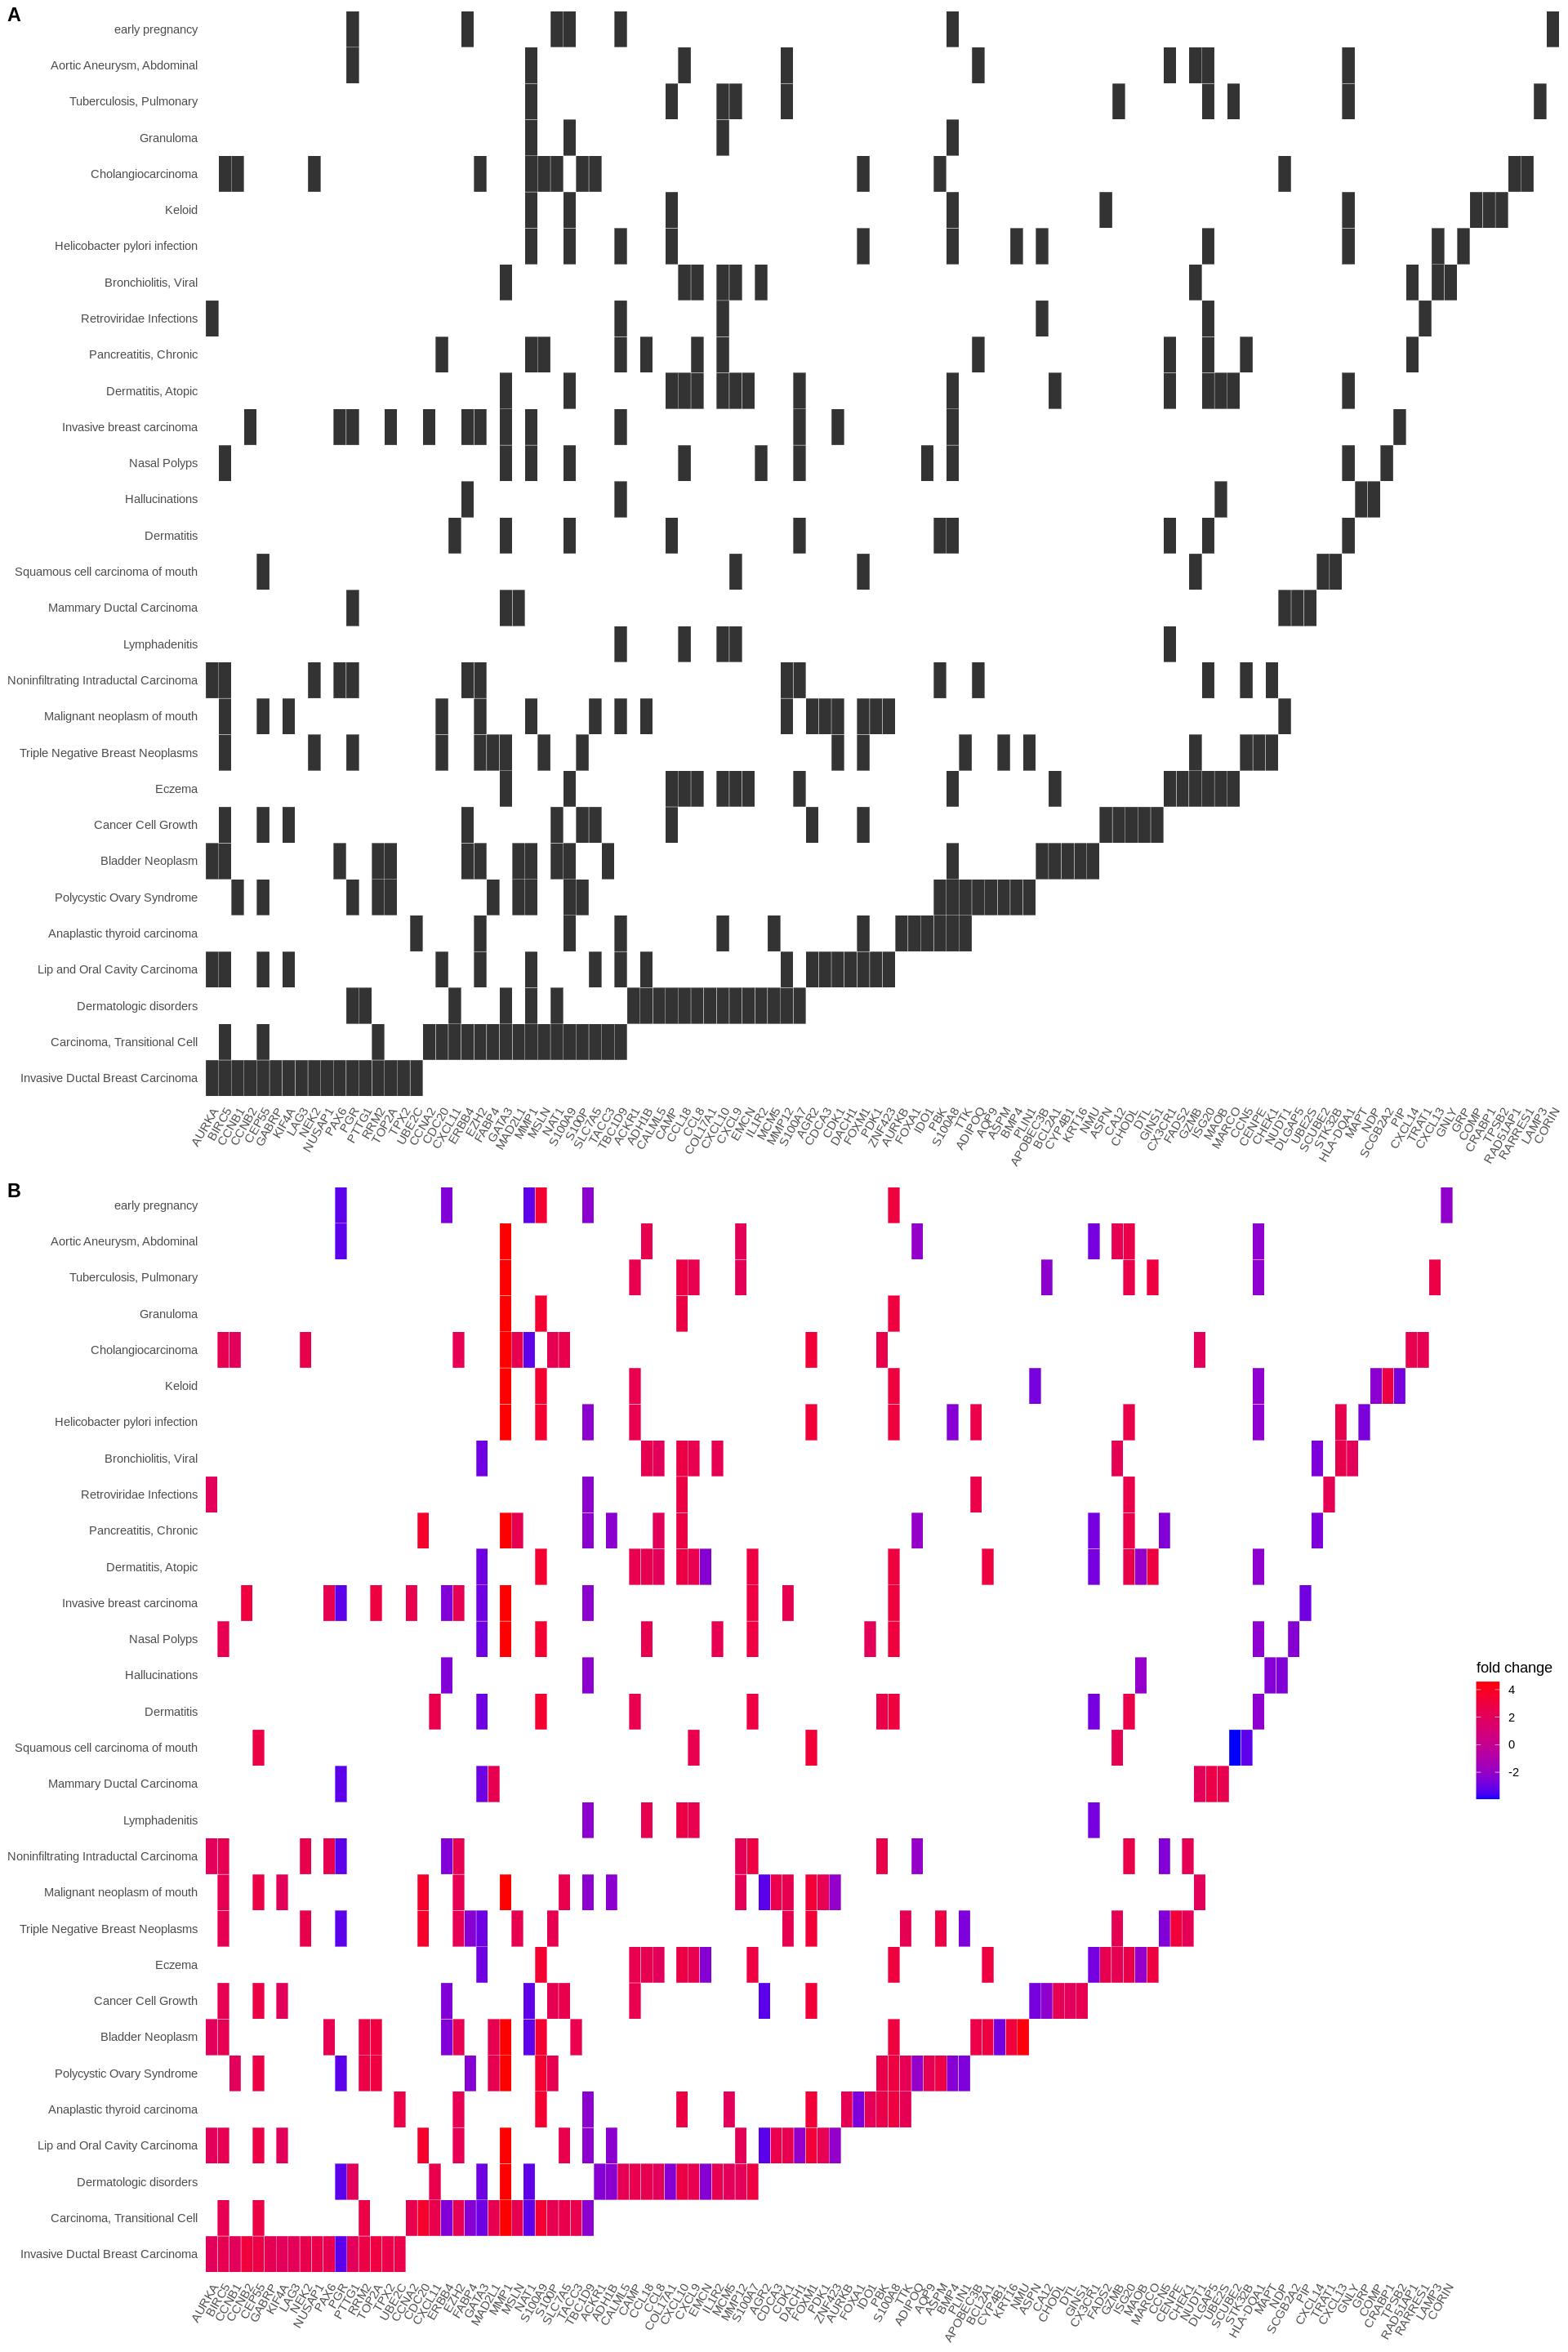

In [17]:
p1 <- heatplot(edox)
p2 <- heatplot(edox, foldChange=geneList)
cowplot::plot_grid(p1, p2, ncol=1, labels=LETTERS[1:2])

# 12.5 Enrichment Map


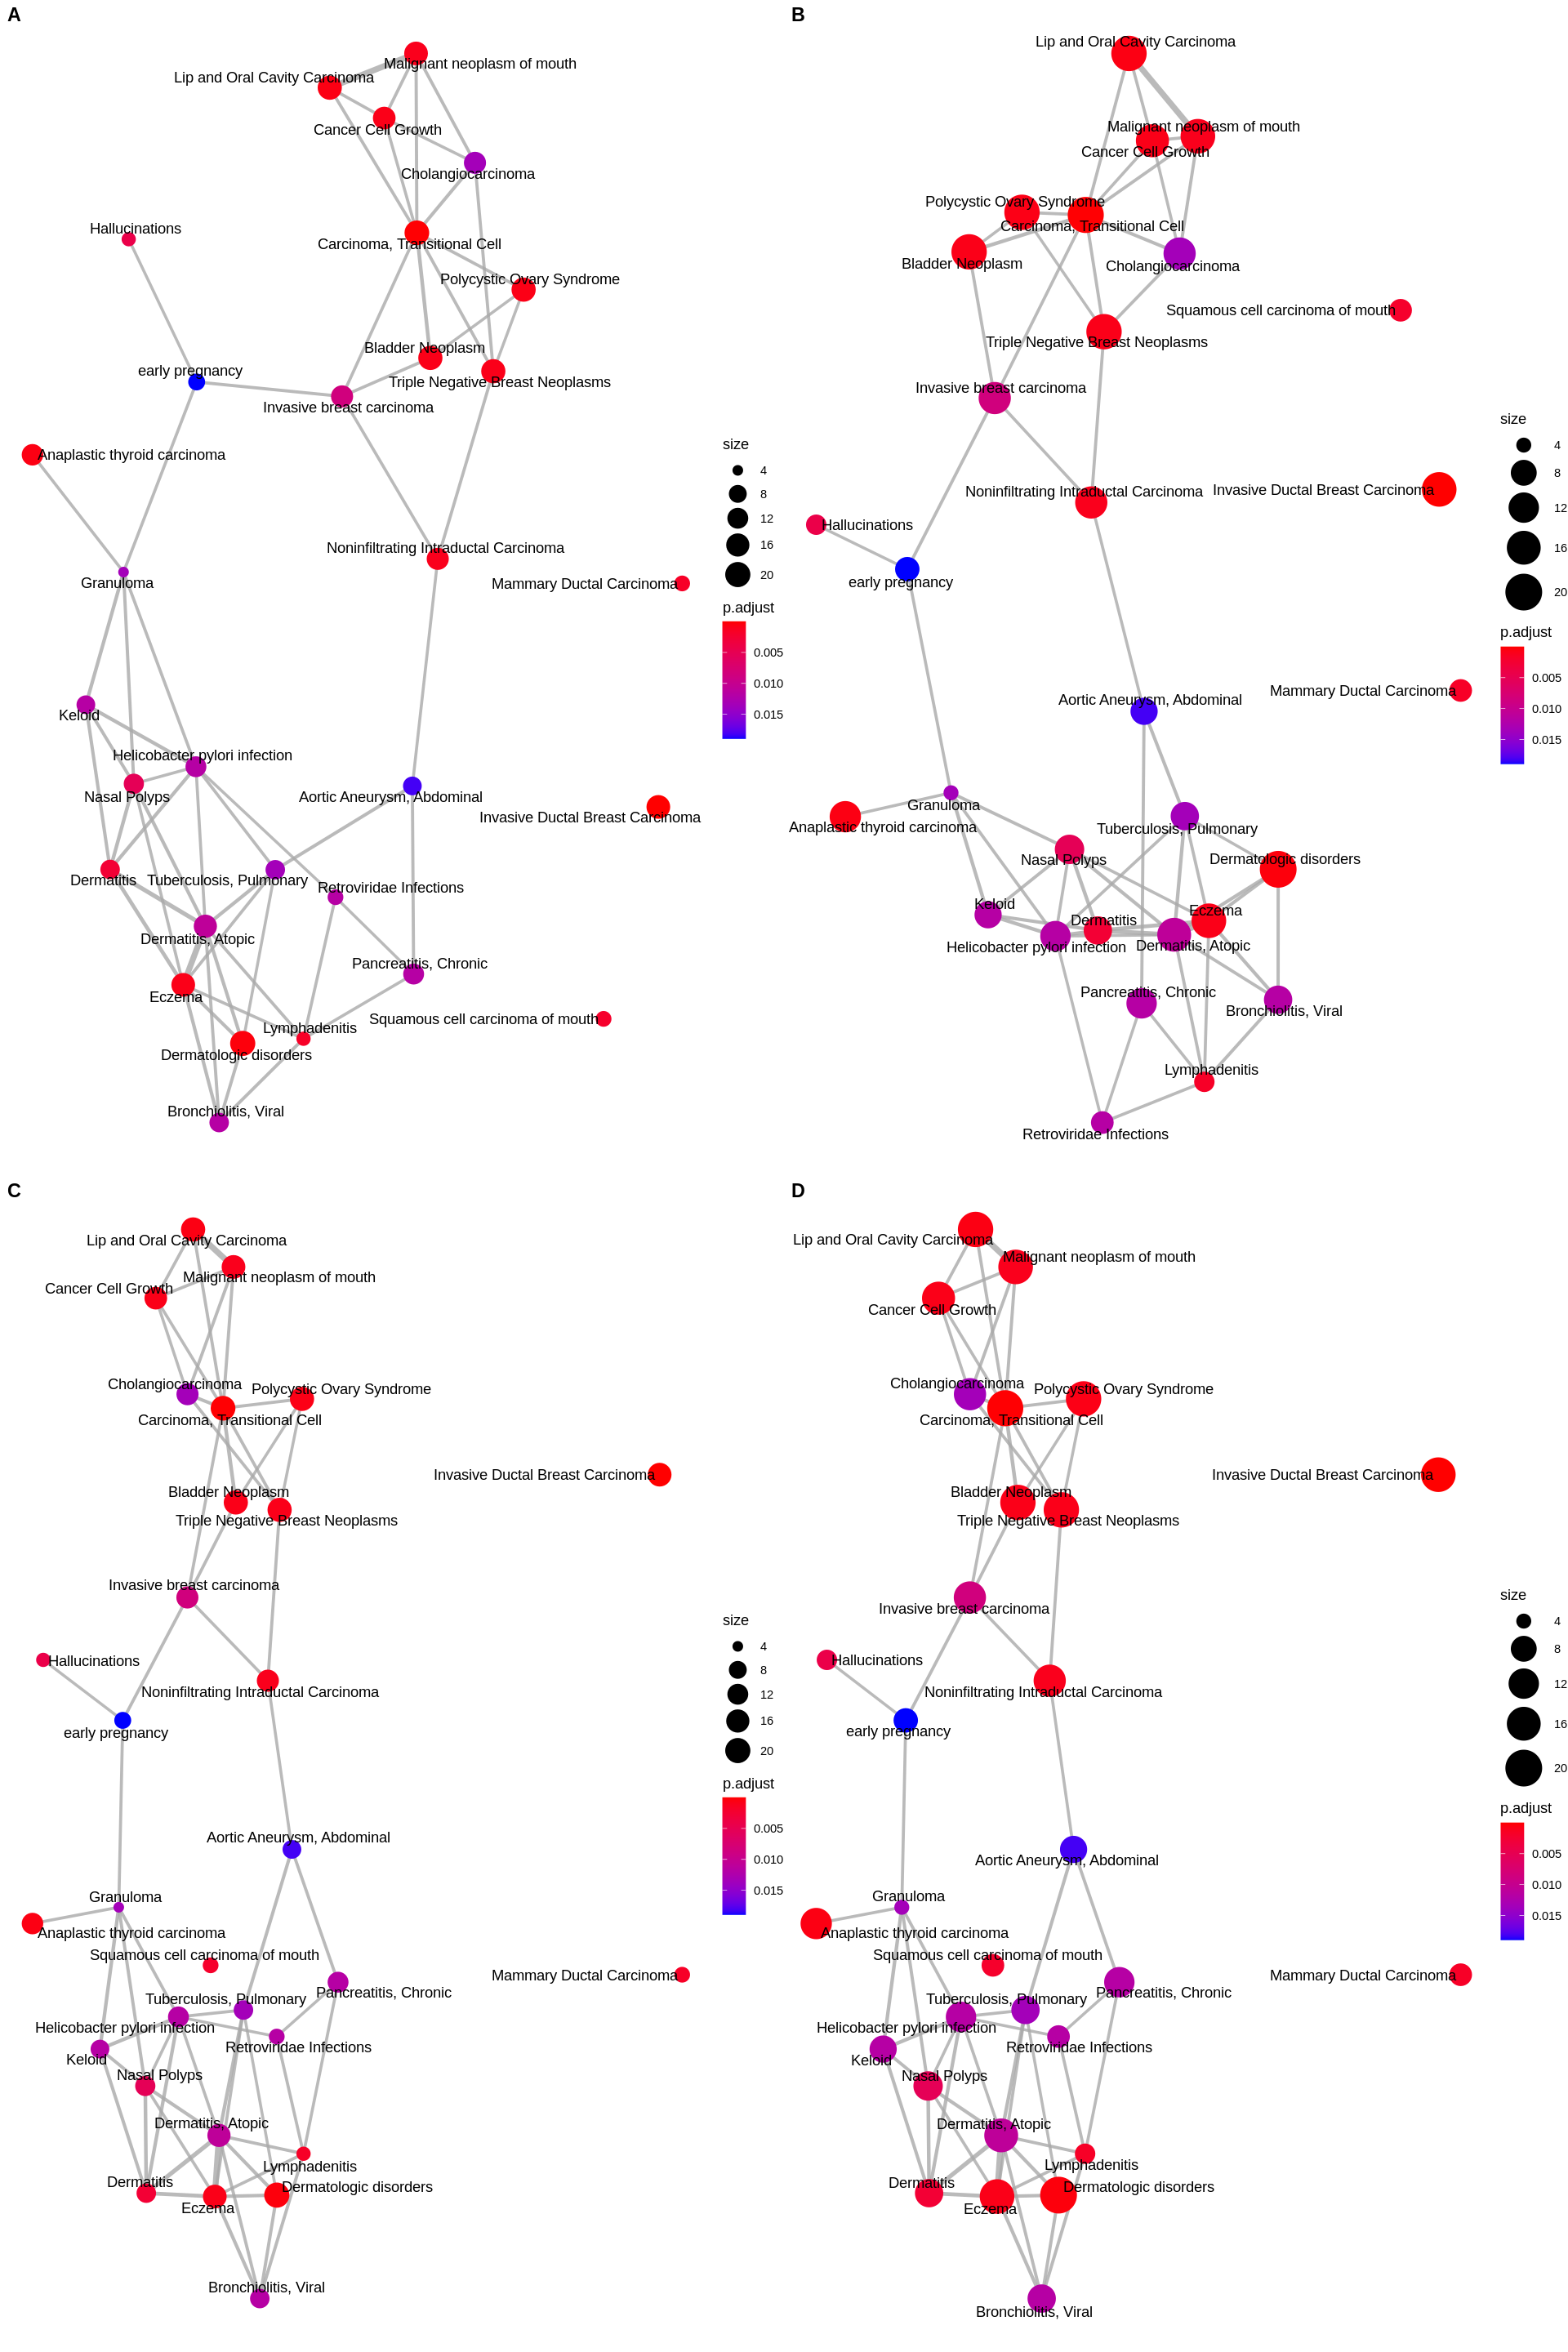

In [18]:
p1 <- emapplot(edo)
p2 <- emapplot(edo, pie_scale=1.5)
p3 <- emapplot(edo,layout="kk")
p4 <- emapplot(edo, pie_scale=1.5,layout="kk") 
cowplot::plot_grid(p1, p2, p3, p4, ncol=2, labels=LETTERS[1:4])

clusterProfiler v3.17.0  For help: https://guangchuangyu.github.io/software/clusterProfiler

If you use clusterProfiler in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Yanyan Han, Qing-Yu He. clusterProfiler: an R package for comparing biological themes among gene clusters. OMICS: A Journal of Integrative Biology. 2012, 16(5):284-287.

Attaching package: ‘clusterProfiler’

The following object is masked from ‘package:AnnotationDbi’:

    select

The following object is masked from ‘package:IRanges’:

    slice

The following object is masked from ‘package:S4Vectors’:

    rename

The following object is masked from ‘package:stats’:

    filter



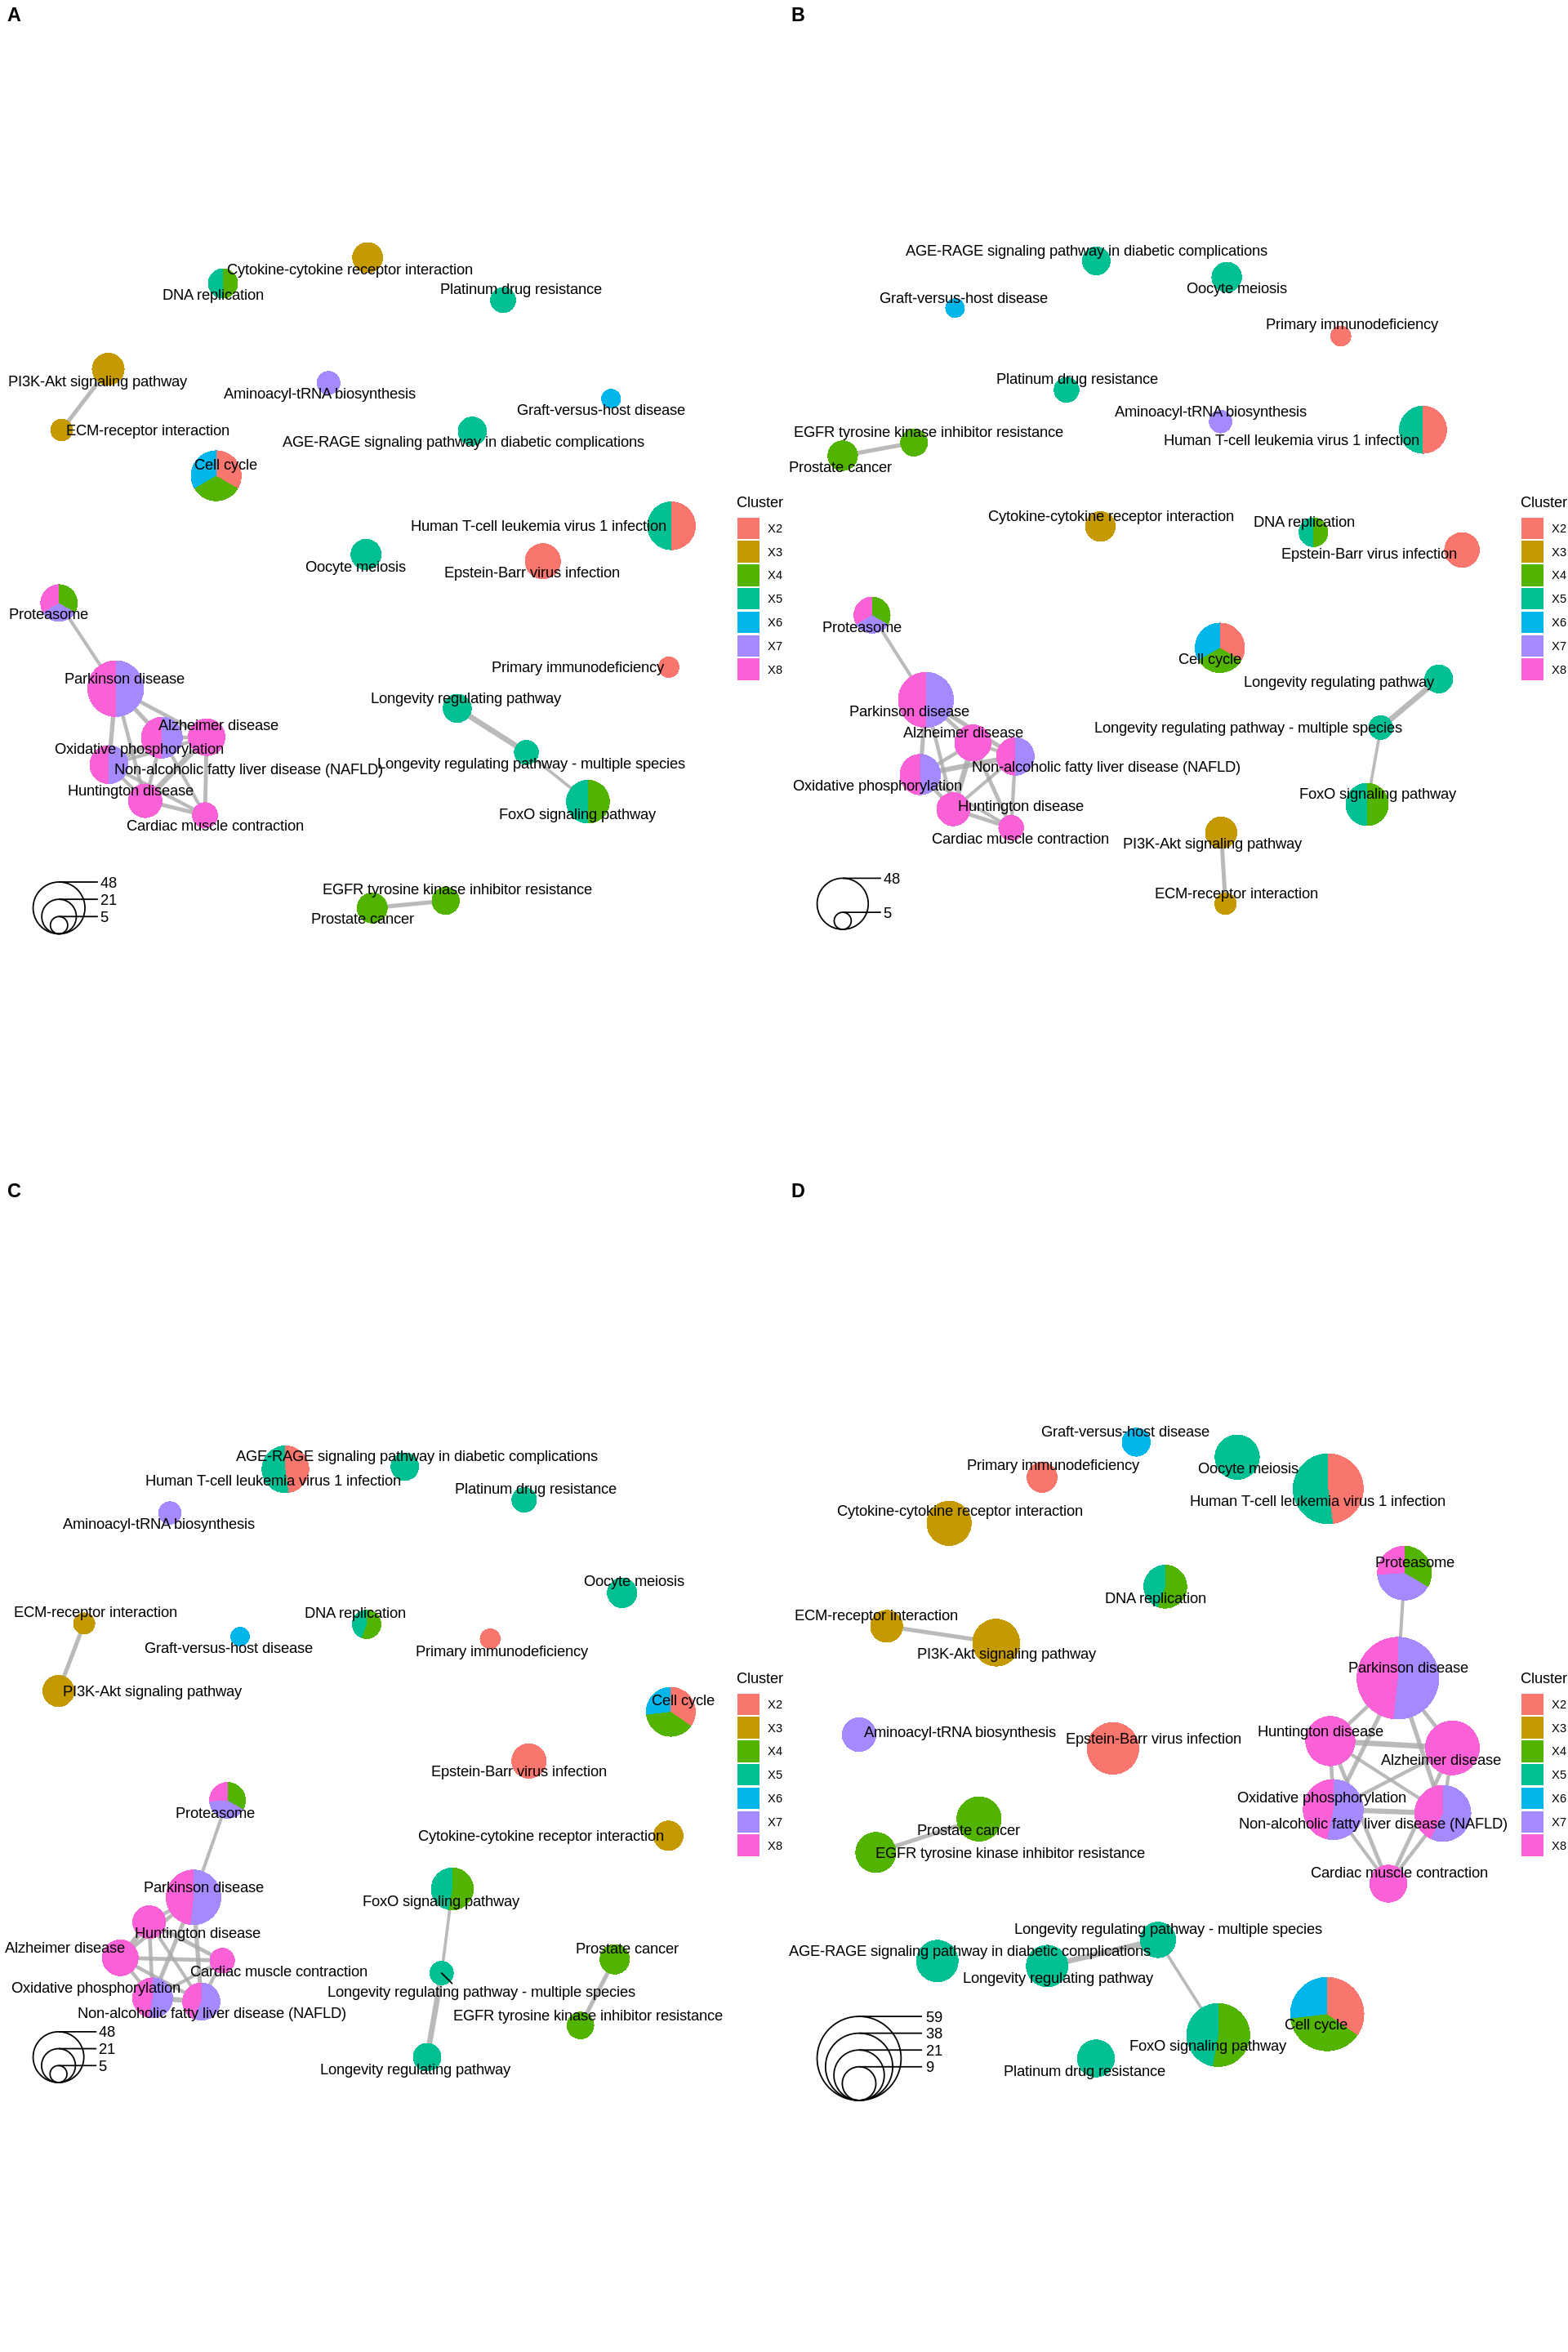

In [19]:
library(clusterProfiler)
data(gcSample)
xx <- compareCluster(gcSample, fun="enrichKEGG",
                     organism="hsa", pvalueCutoff=0.05)
p1 <- emapplot(xx)
p2 <- emapplot(xx,legend_n=2) 
p3 <- emapplot(xx,pie="count")
p4 <- emapplot(xx,pie="count", pie_scale=1.5, layout="kk")
cowplot::plot_grid(p1, p2, p3, p4, ncol=2, labels=LETTERS[1:4])

# 12.6 UpSet Plot


[1] ‘0.3.0’

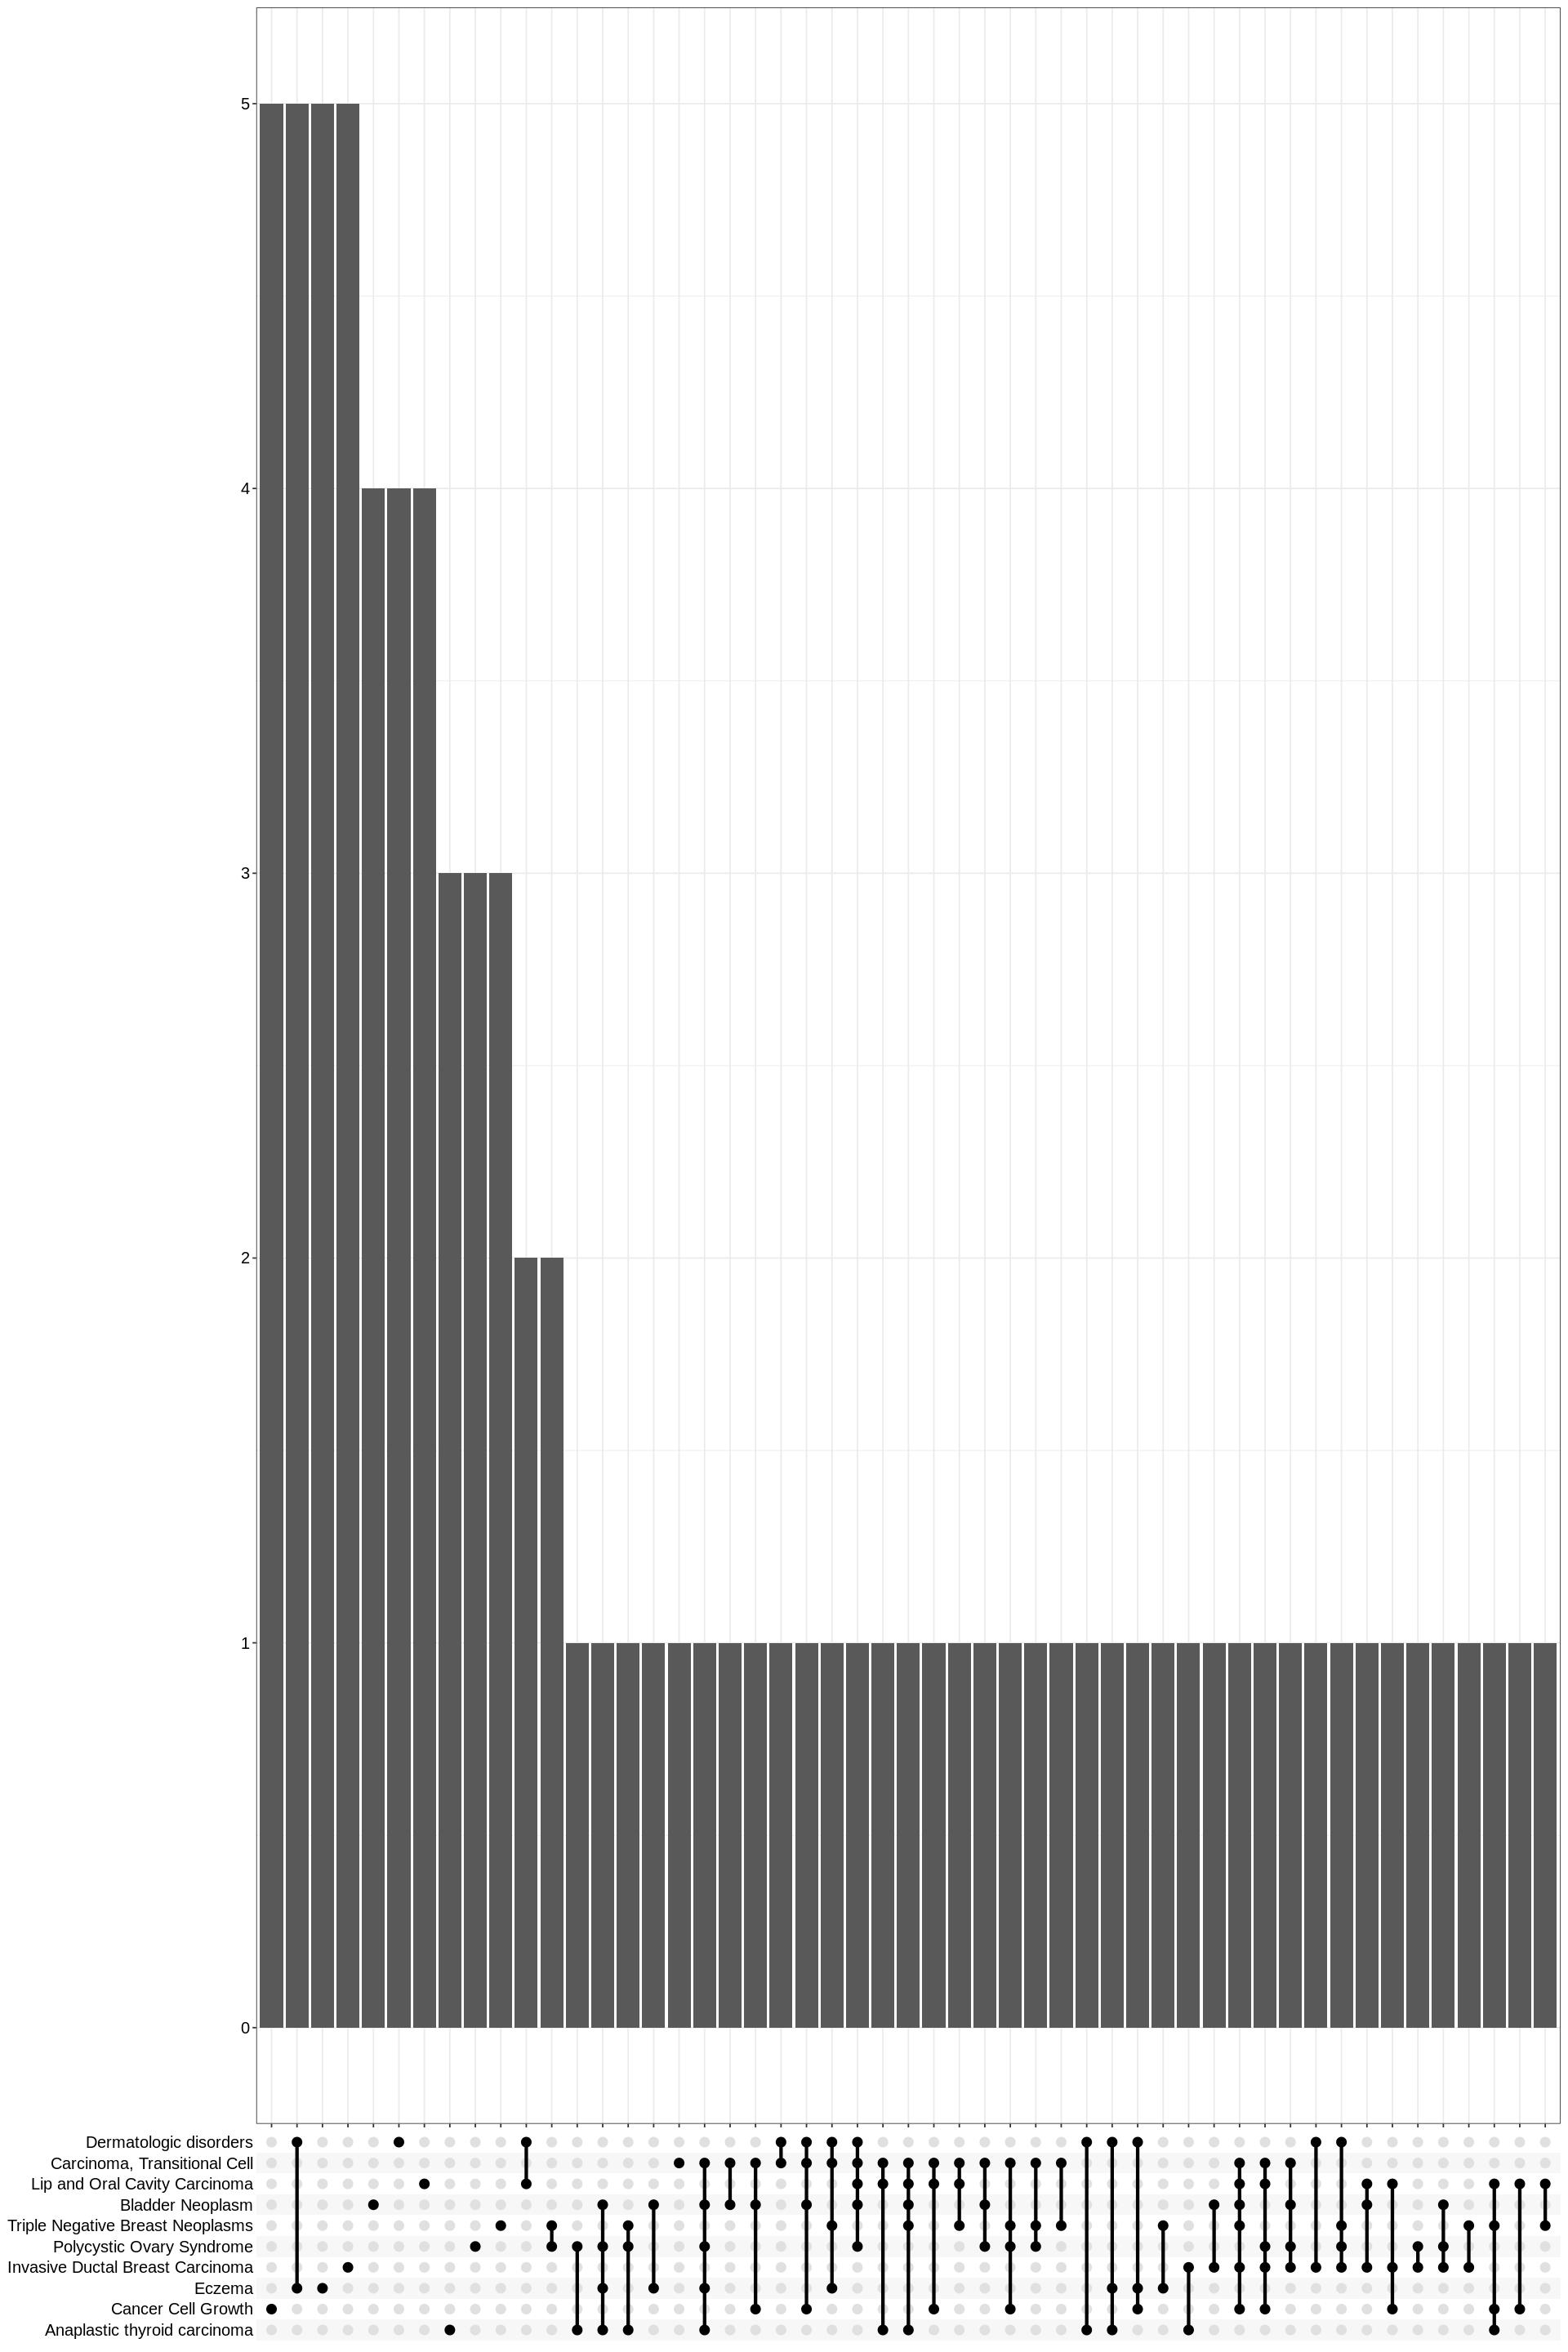

In [22]:
#BiocManager::install("ggupset")
library(ggupset)
packageVersion("ggupset")


upsetplot(edo)

unsolved: what is the kk2?

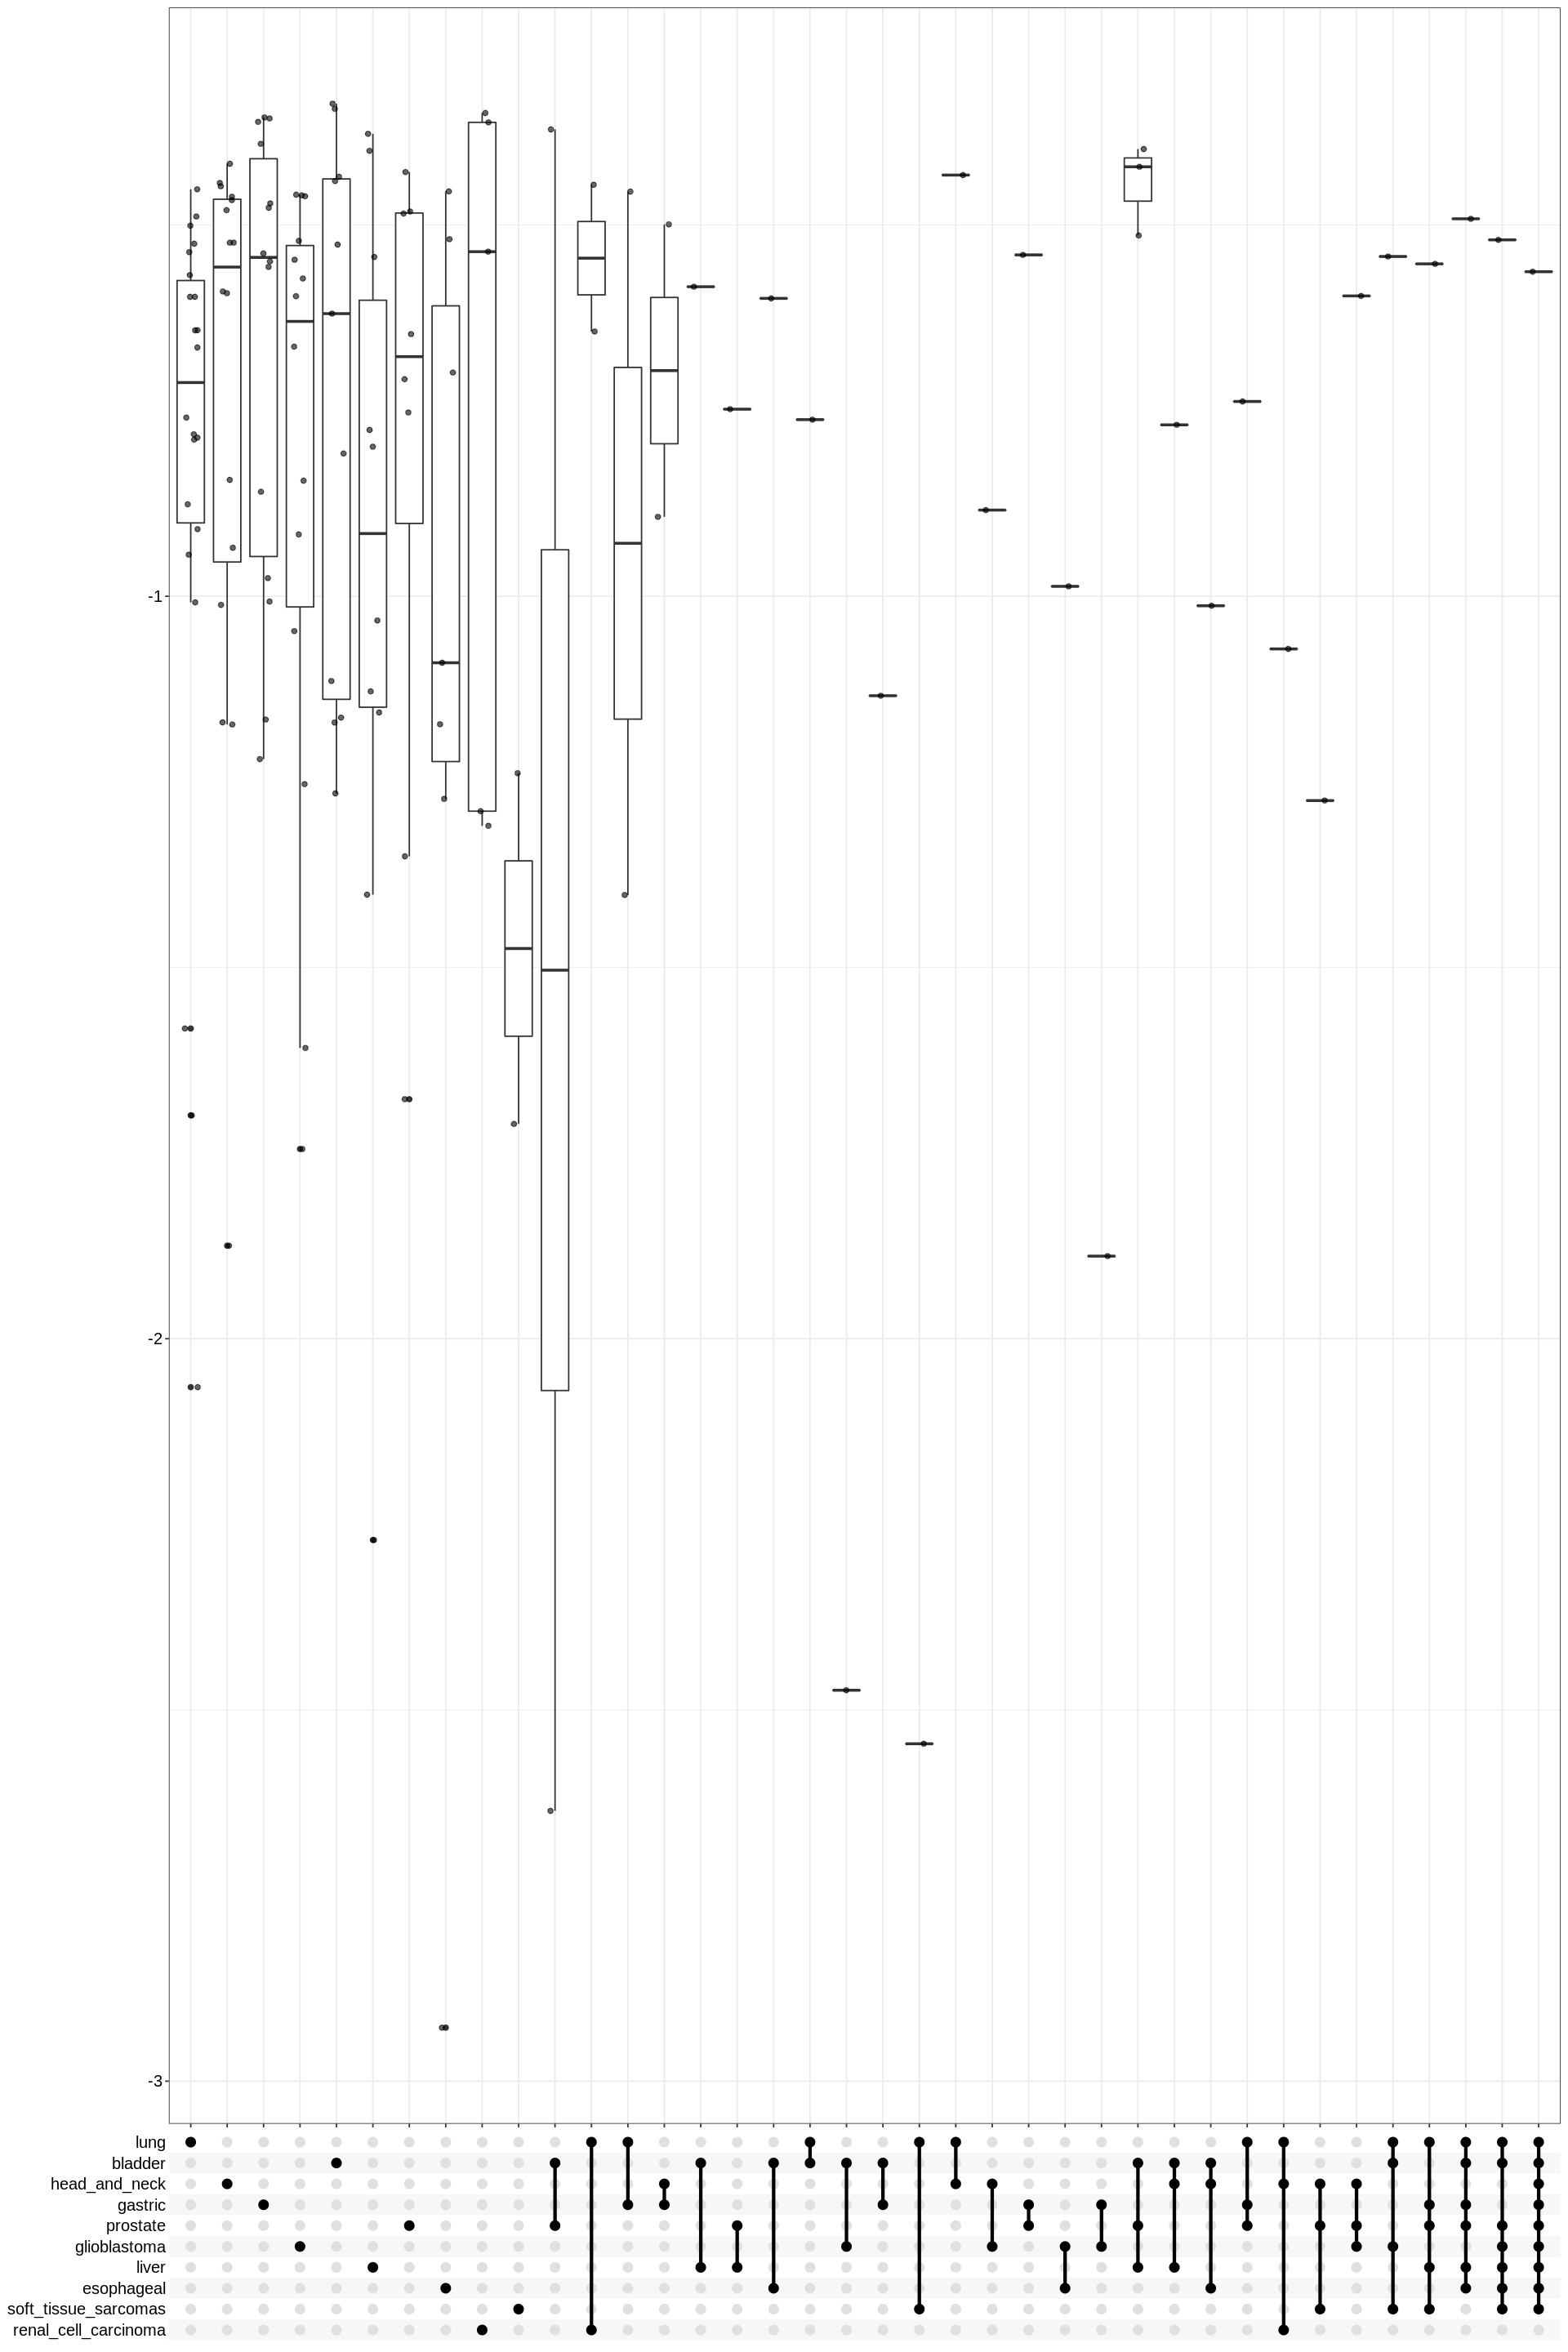

In [21]:
upsetplot(edo2) 

12.7 ridgeline plot for expression distribution of GSEA result

Picking joint bandwidth of 0.184


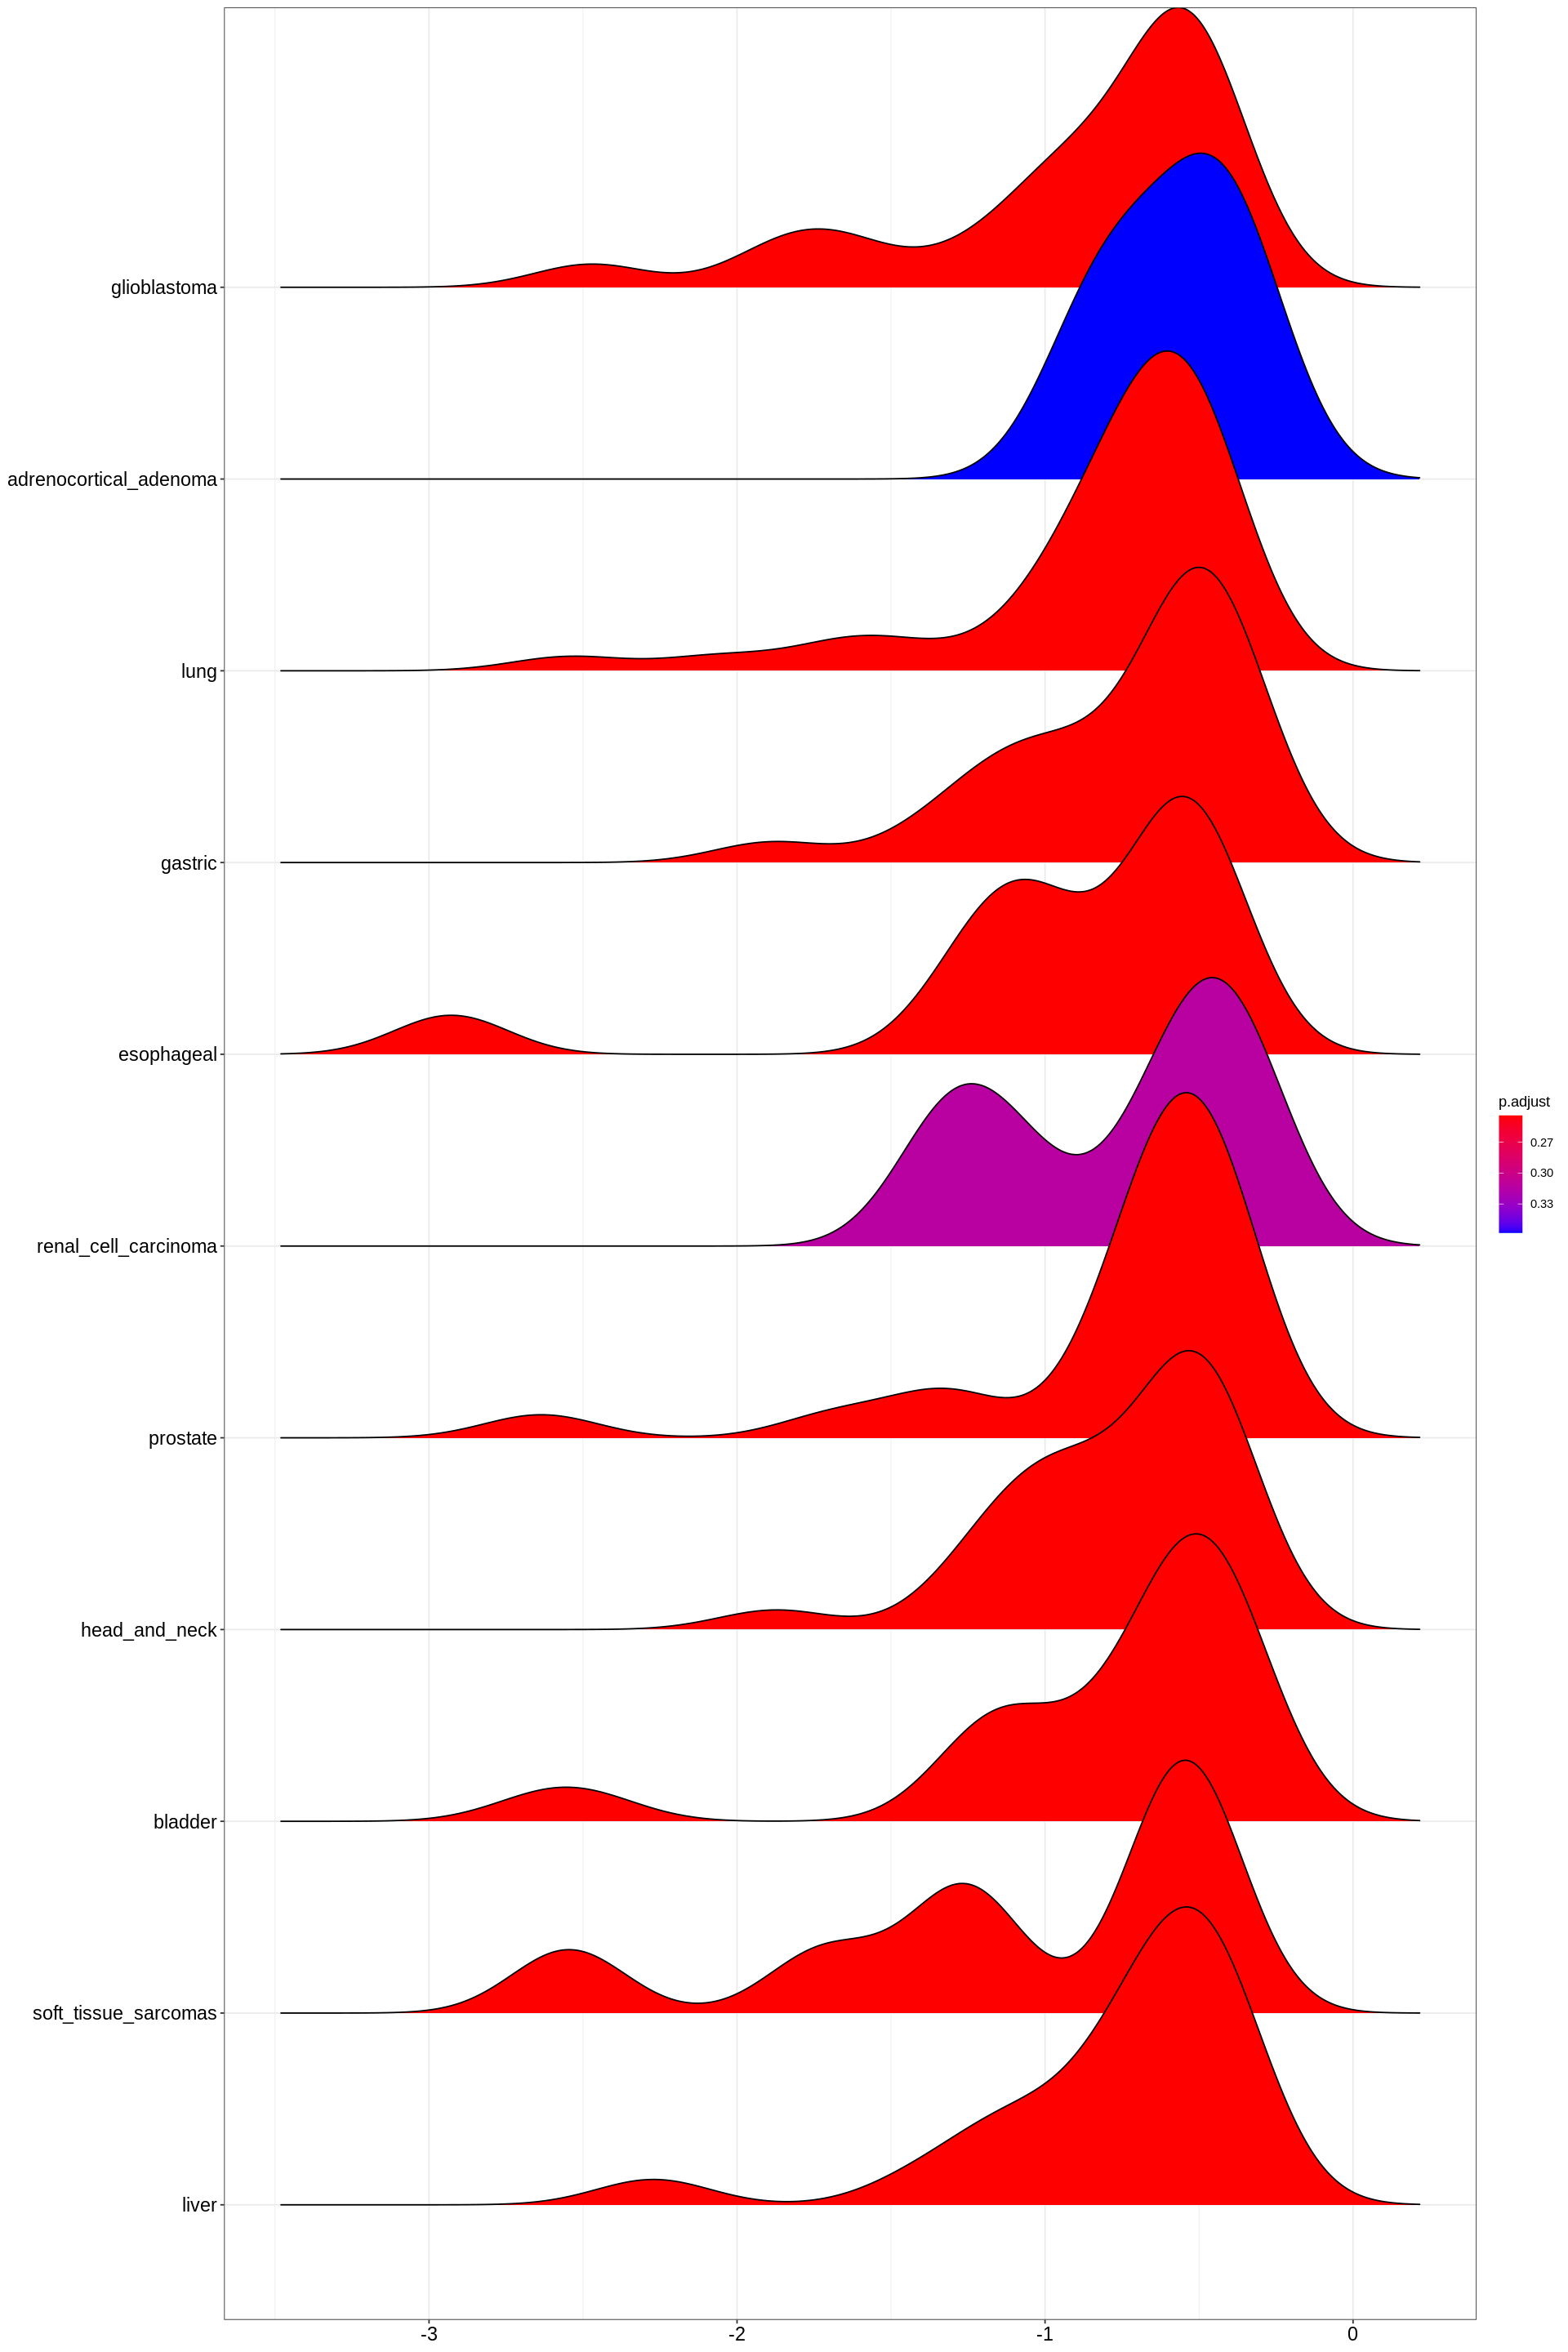

In [23]:
ridgeplot(edo2)

# 12.8 running score and preranked list of GSEA result

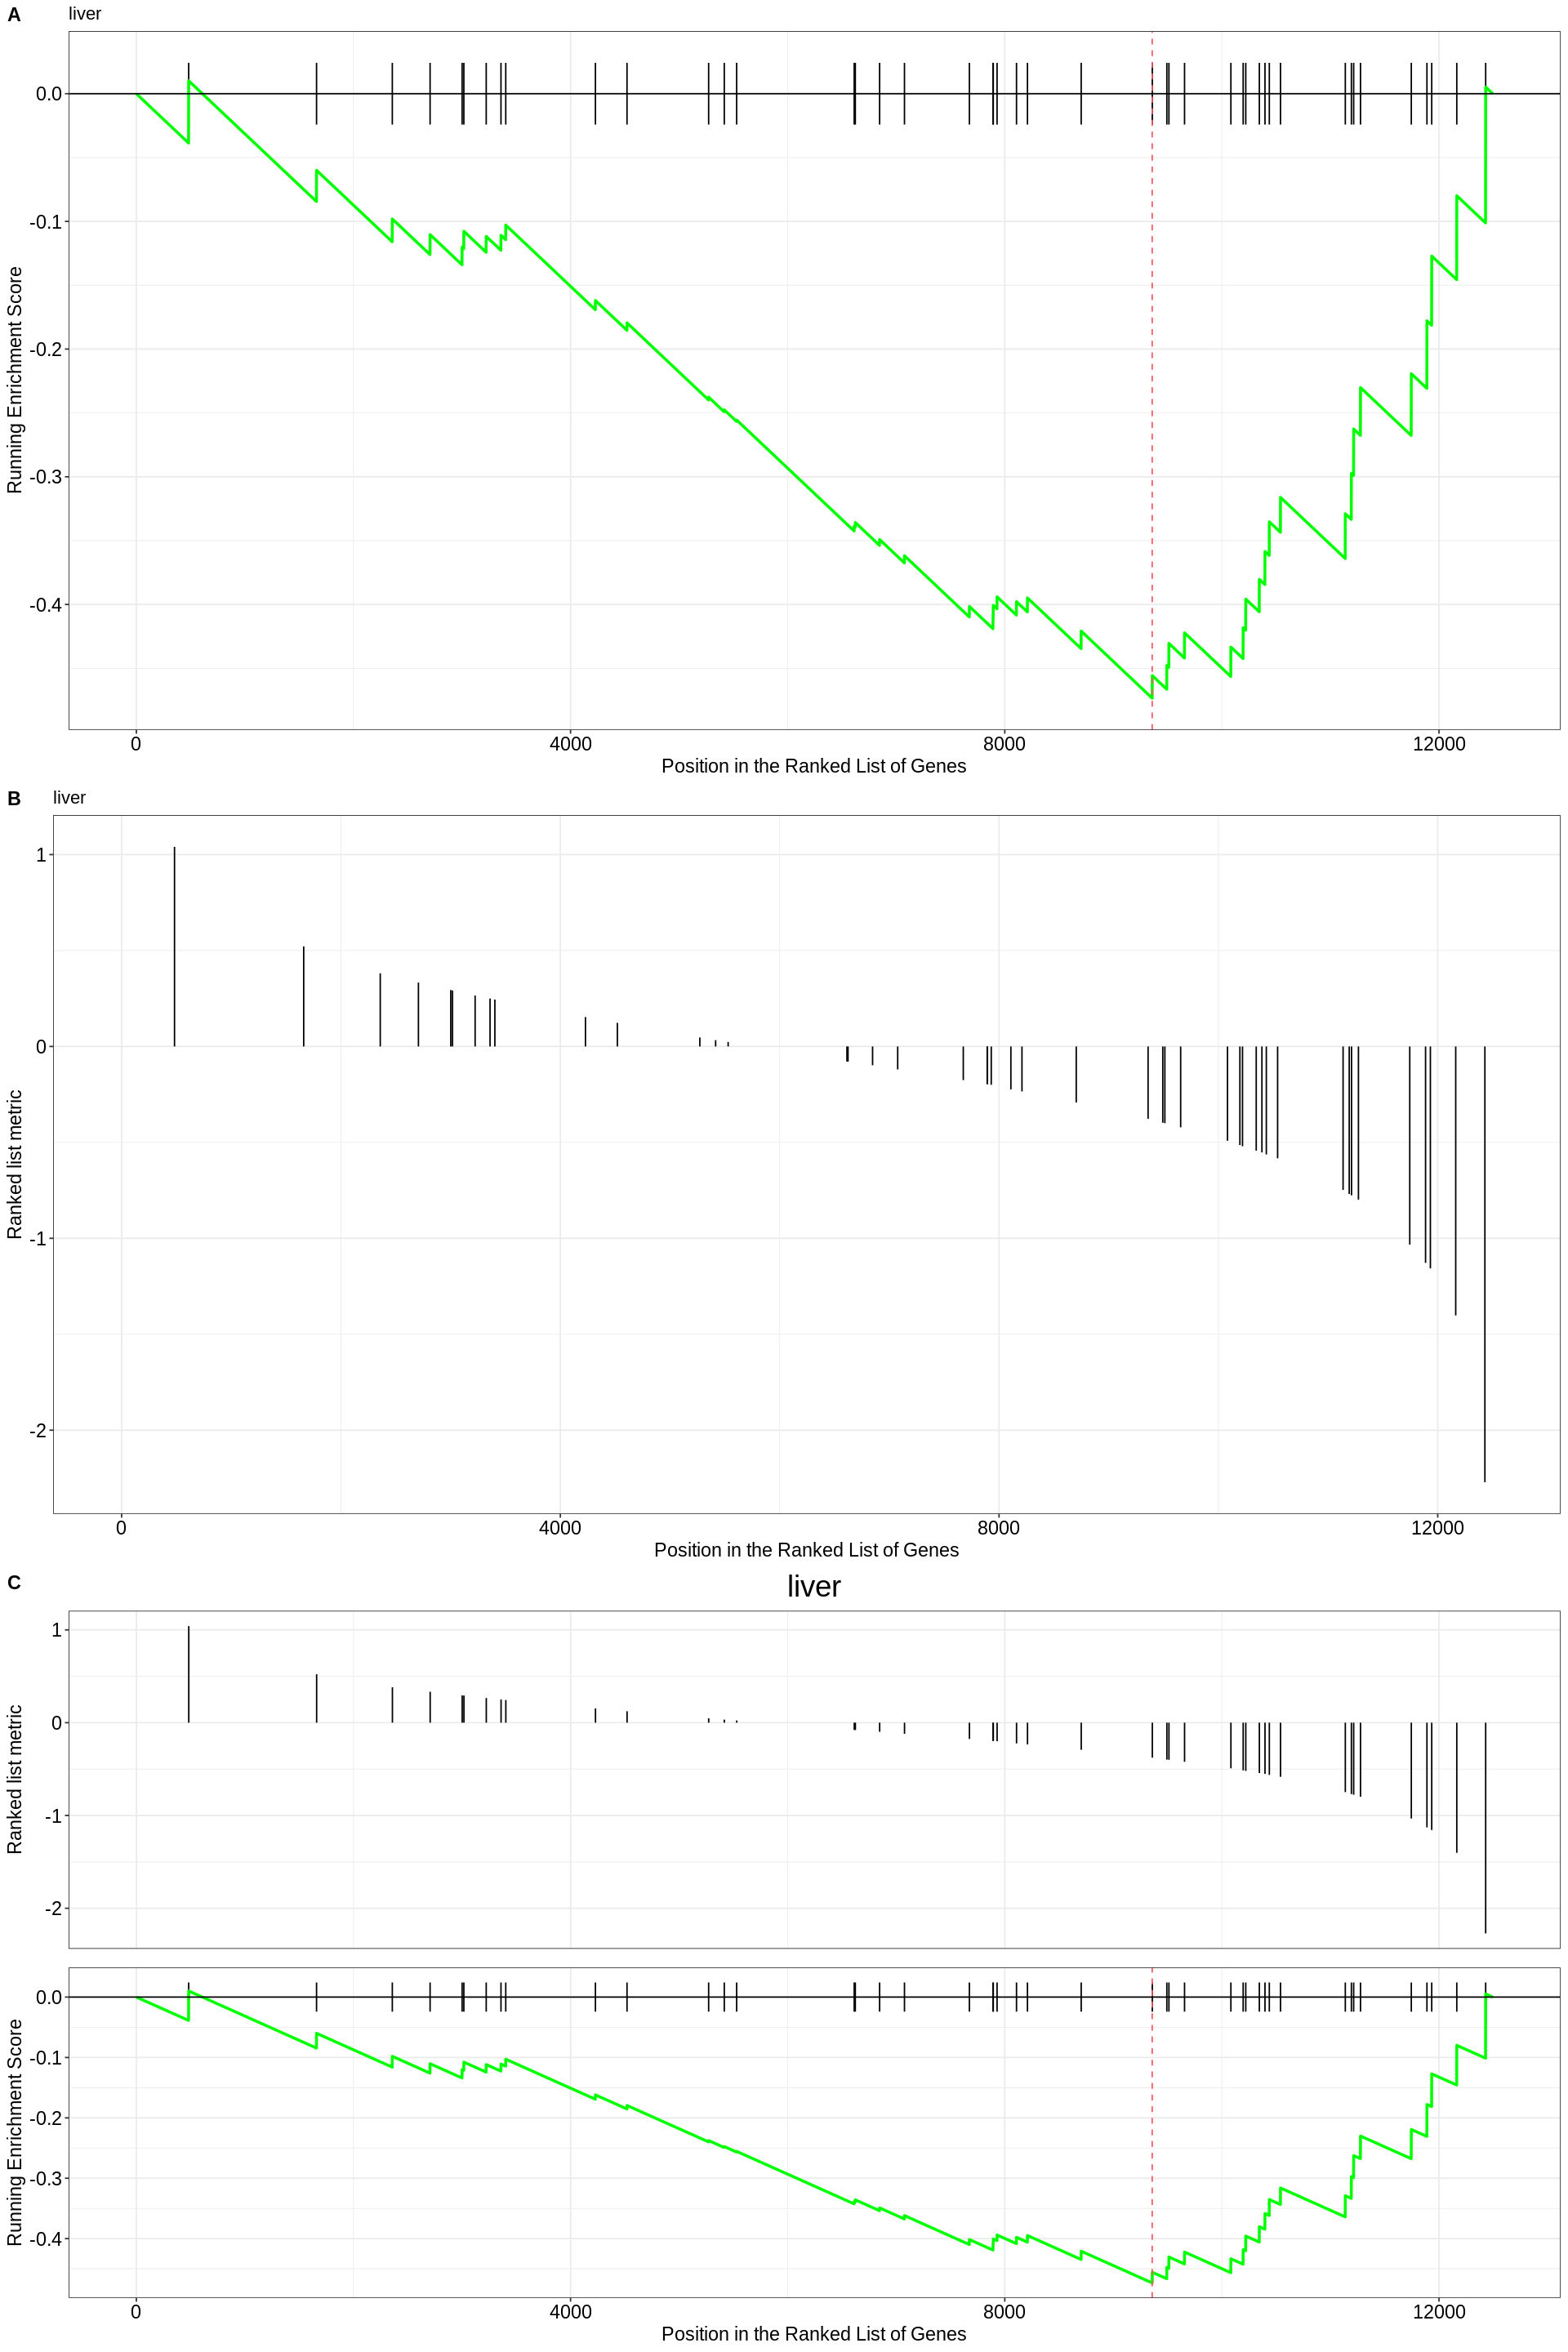

In [24]:
p1 <- gseaplot(edo2, geneSetID = 1, by = "runningScore", title = edo2$Description[1])
p2 <- gseaplot(edo2, geneSetID = 1, by = "preranked", title = edo2$Description[1])
p3 <- gseaplot(edo2, geneSetID = 1, title = edo2$Description[1])
cowplot::plot_grid(p1, p2, p3, ncol=1, labels=LETTERS[1:3])

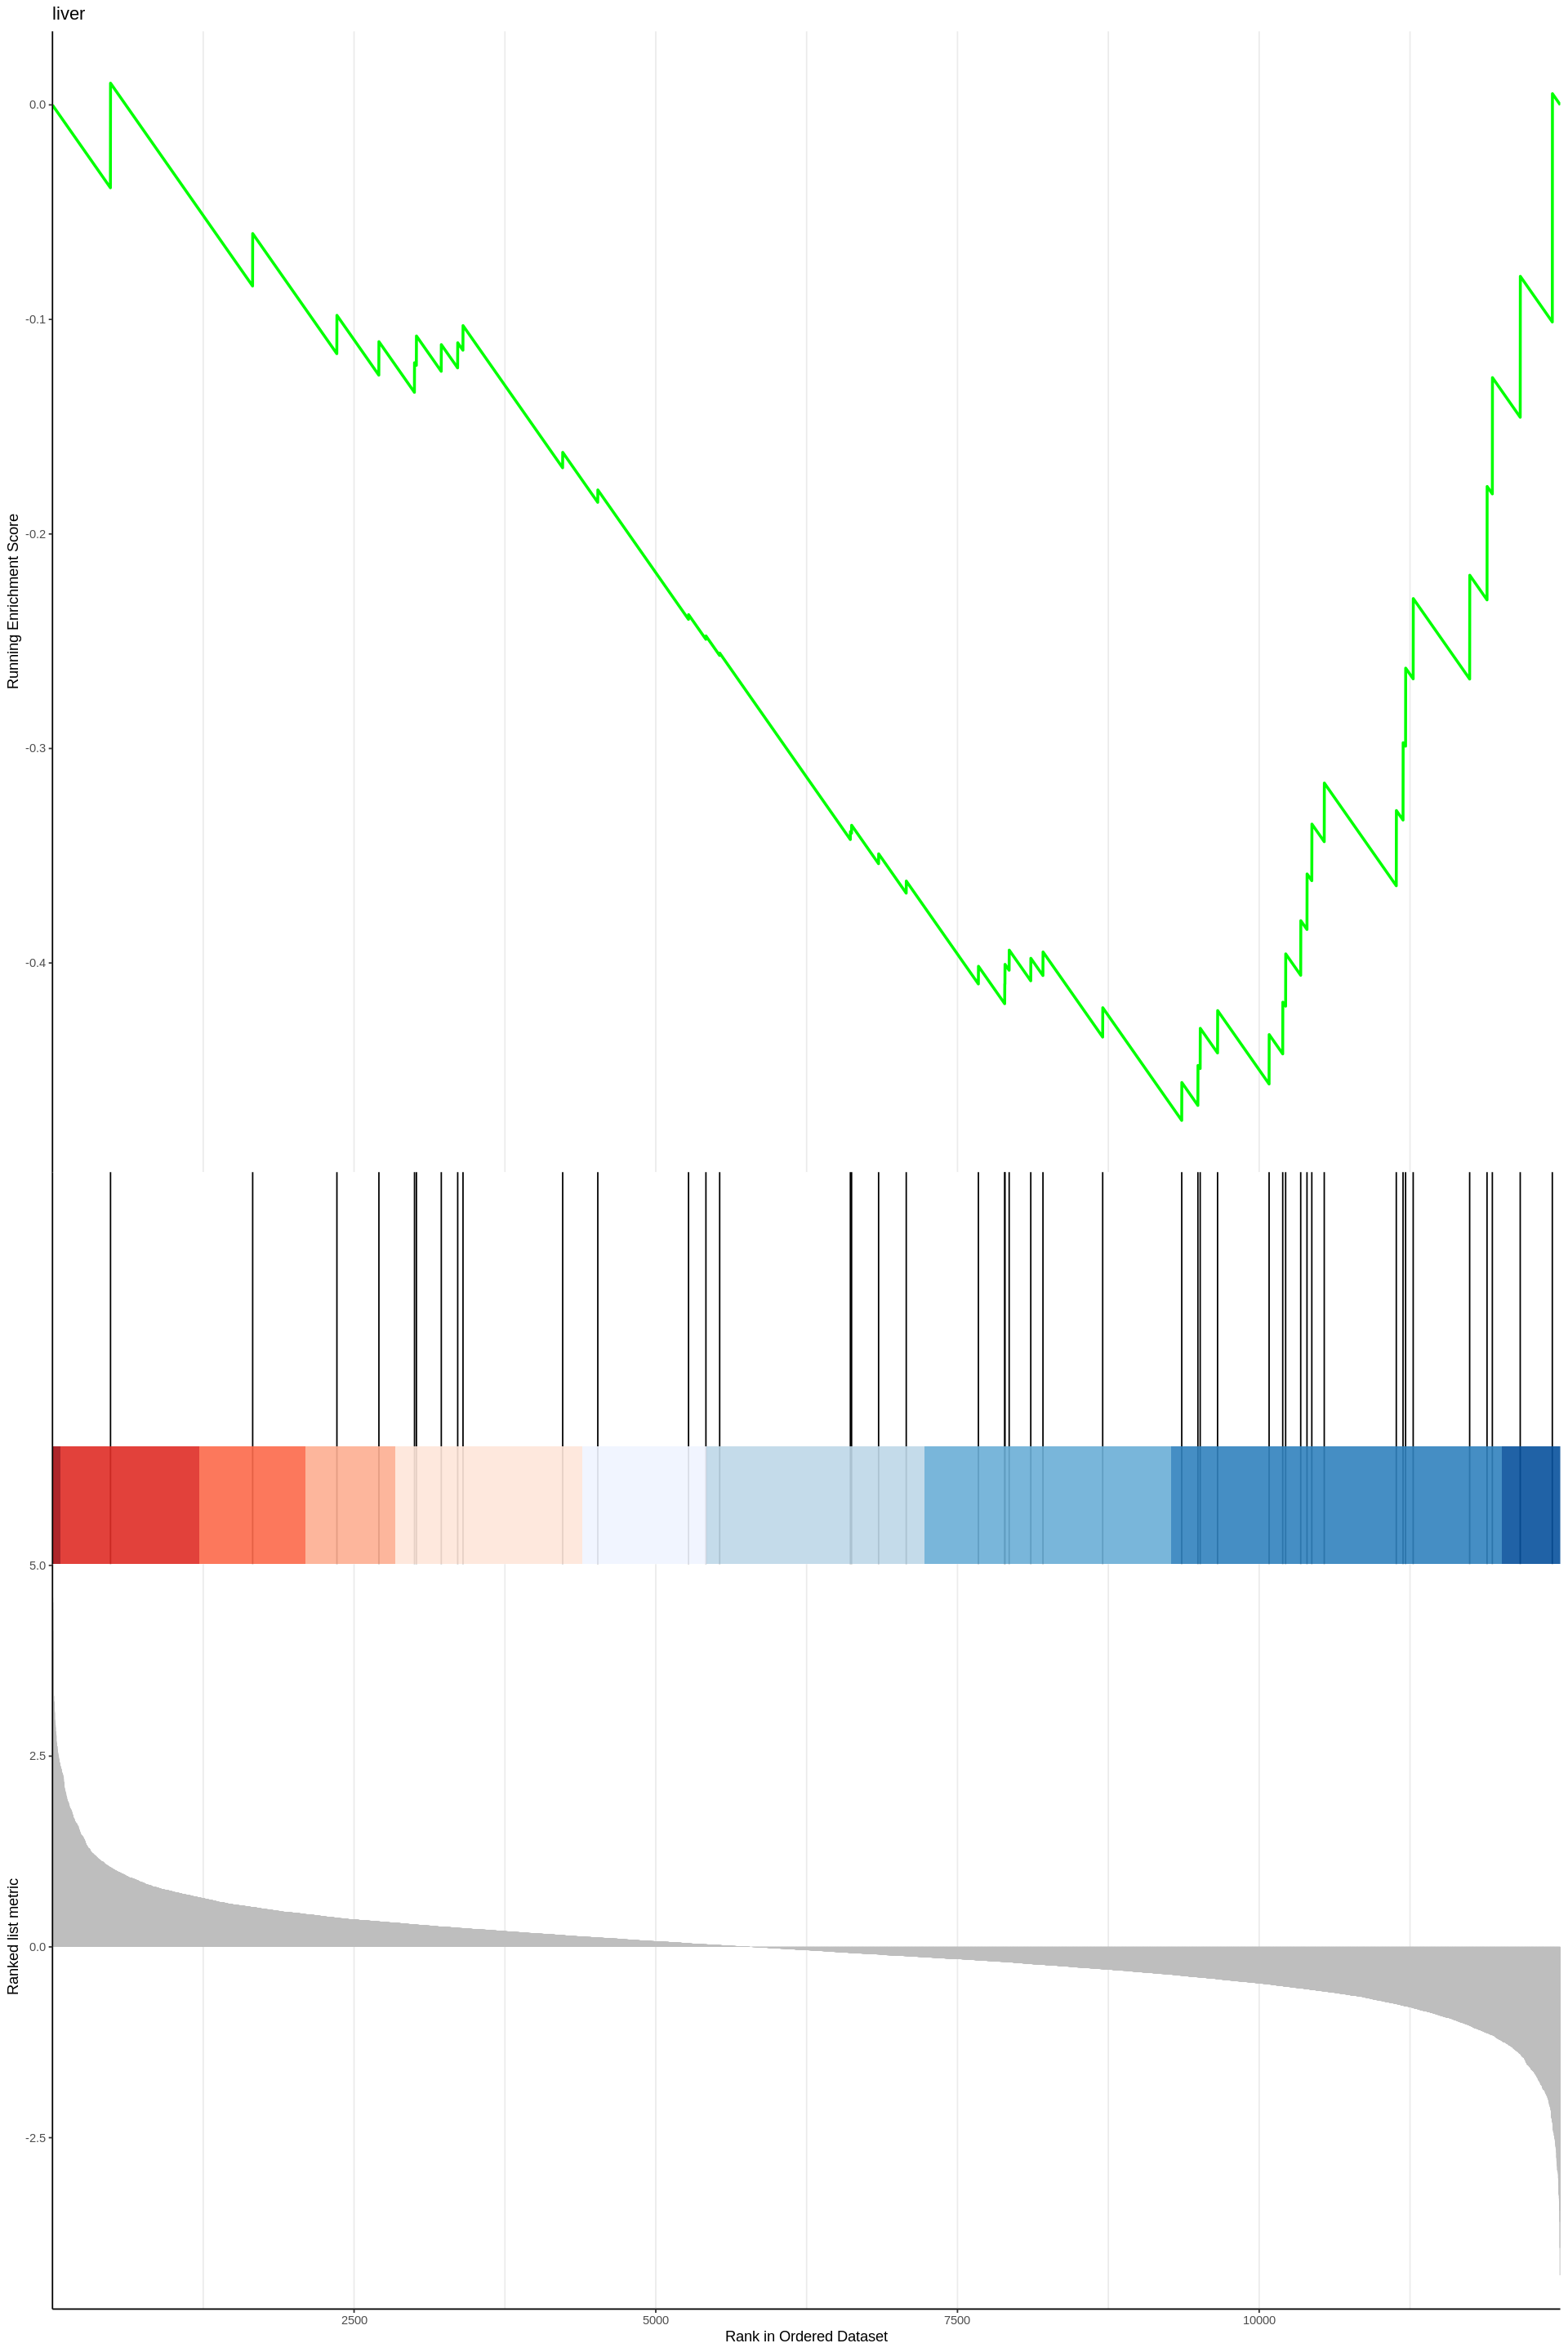

In [25]:
gseaplot2(edo2, geneSetID = 1, title = edo2$Description[1])

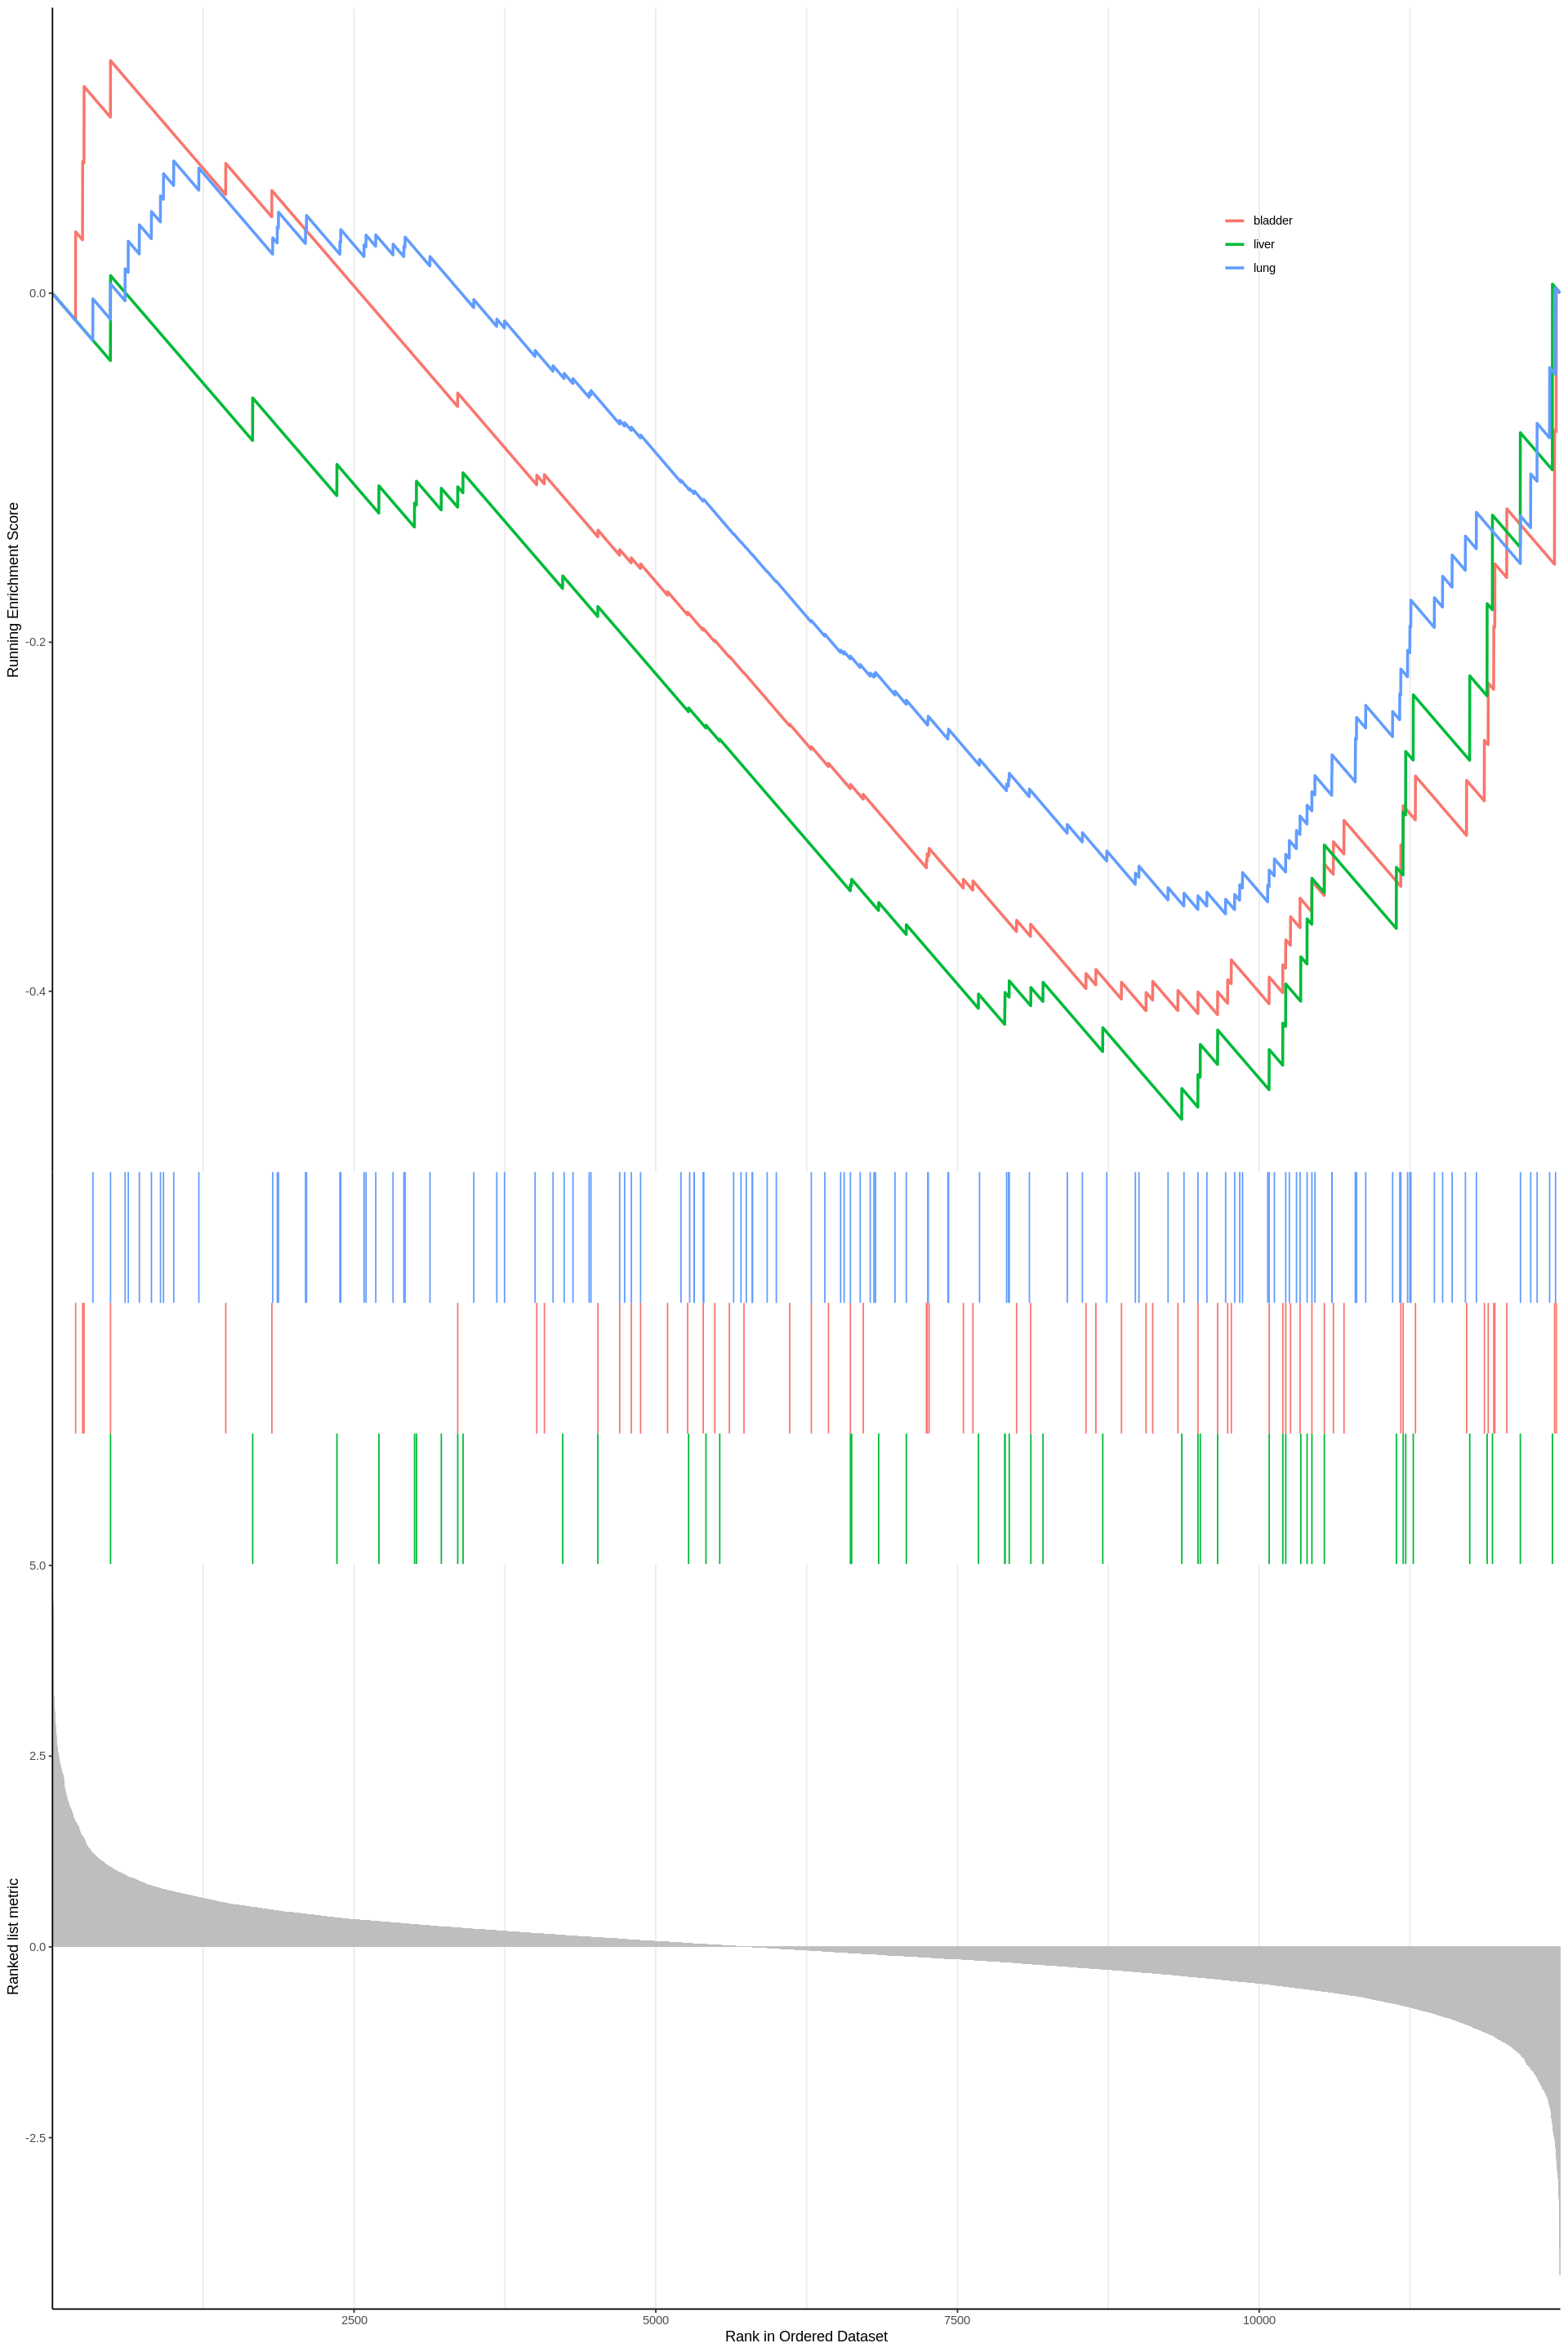

In [26]:
gseaplot2(edo2, geneSetID = 1:3)

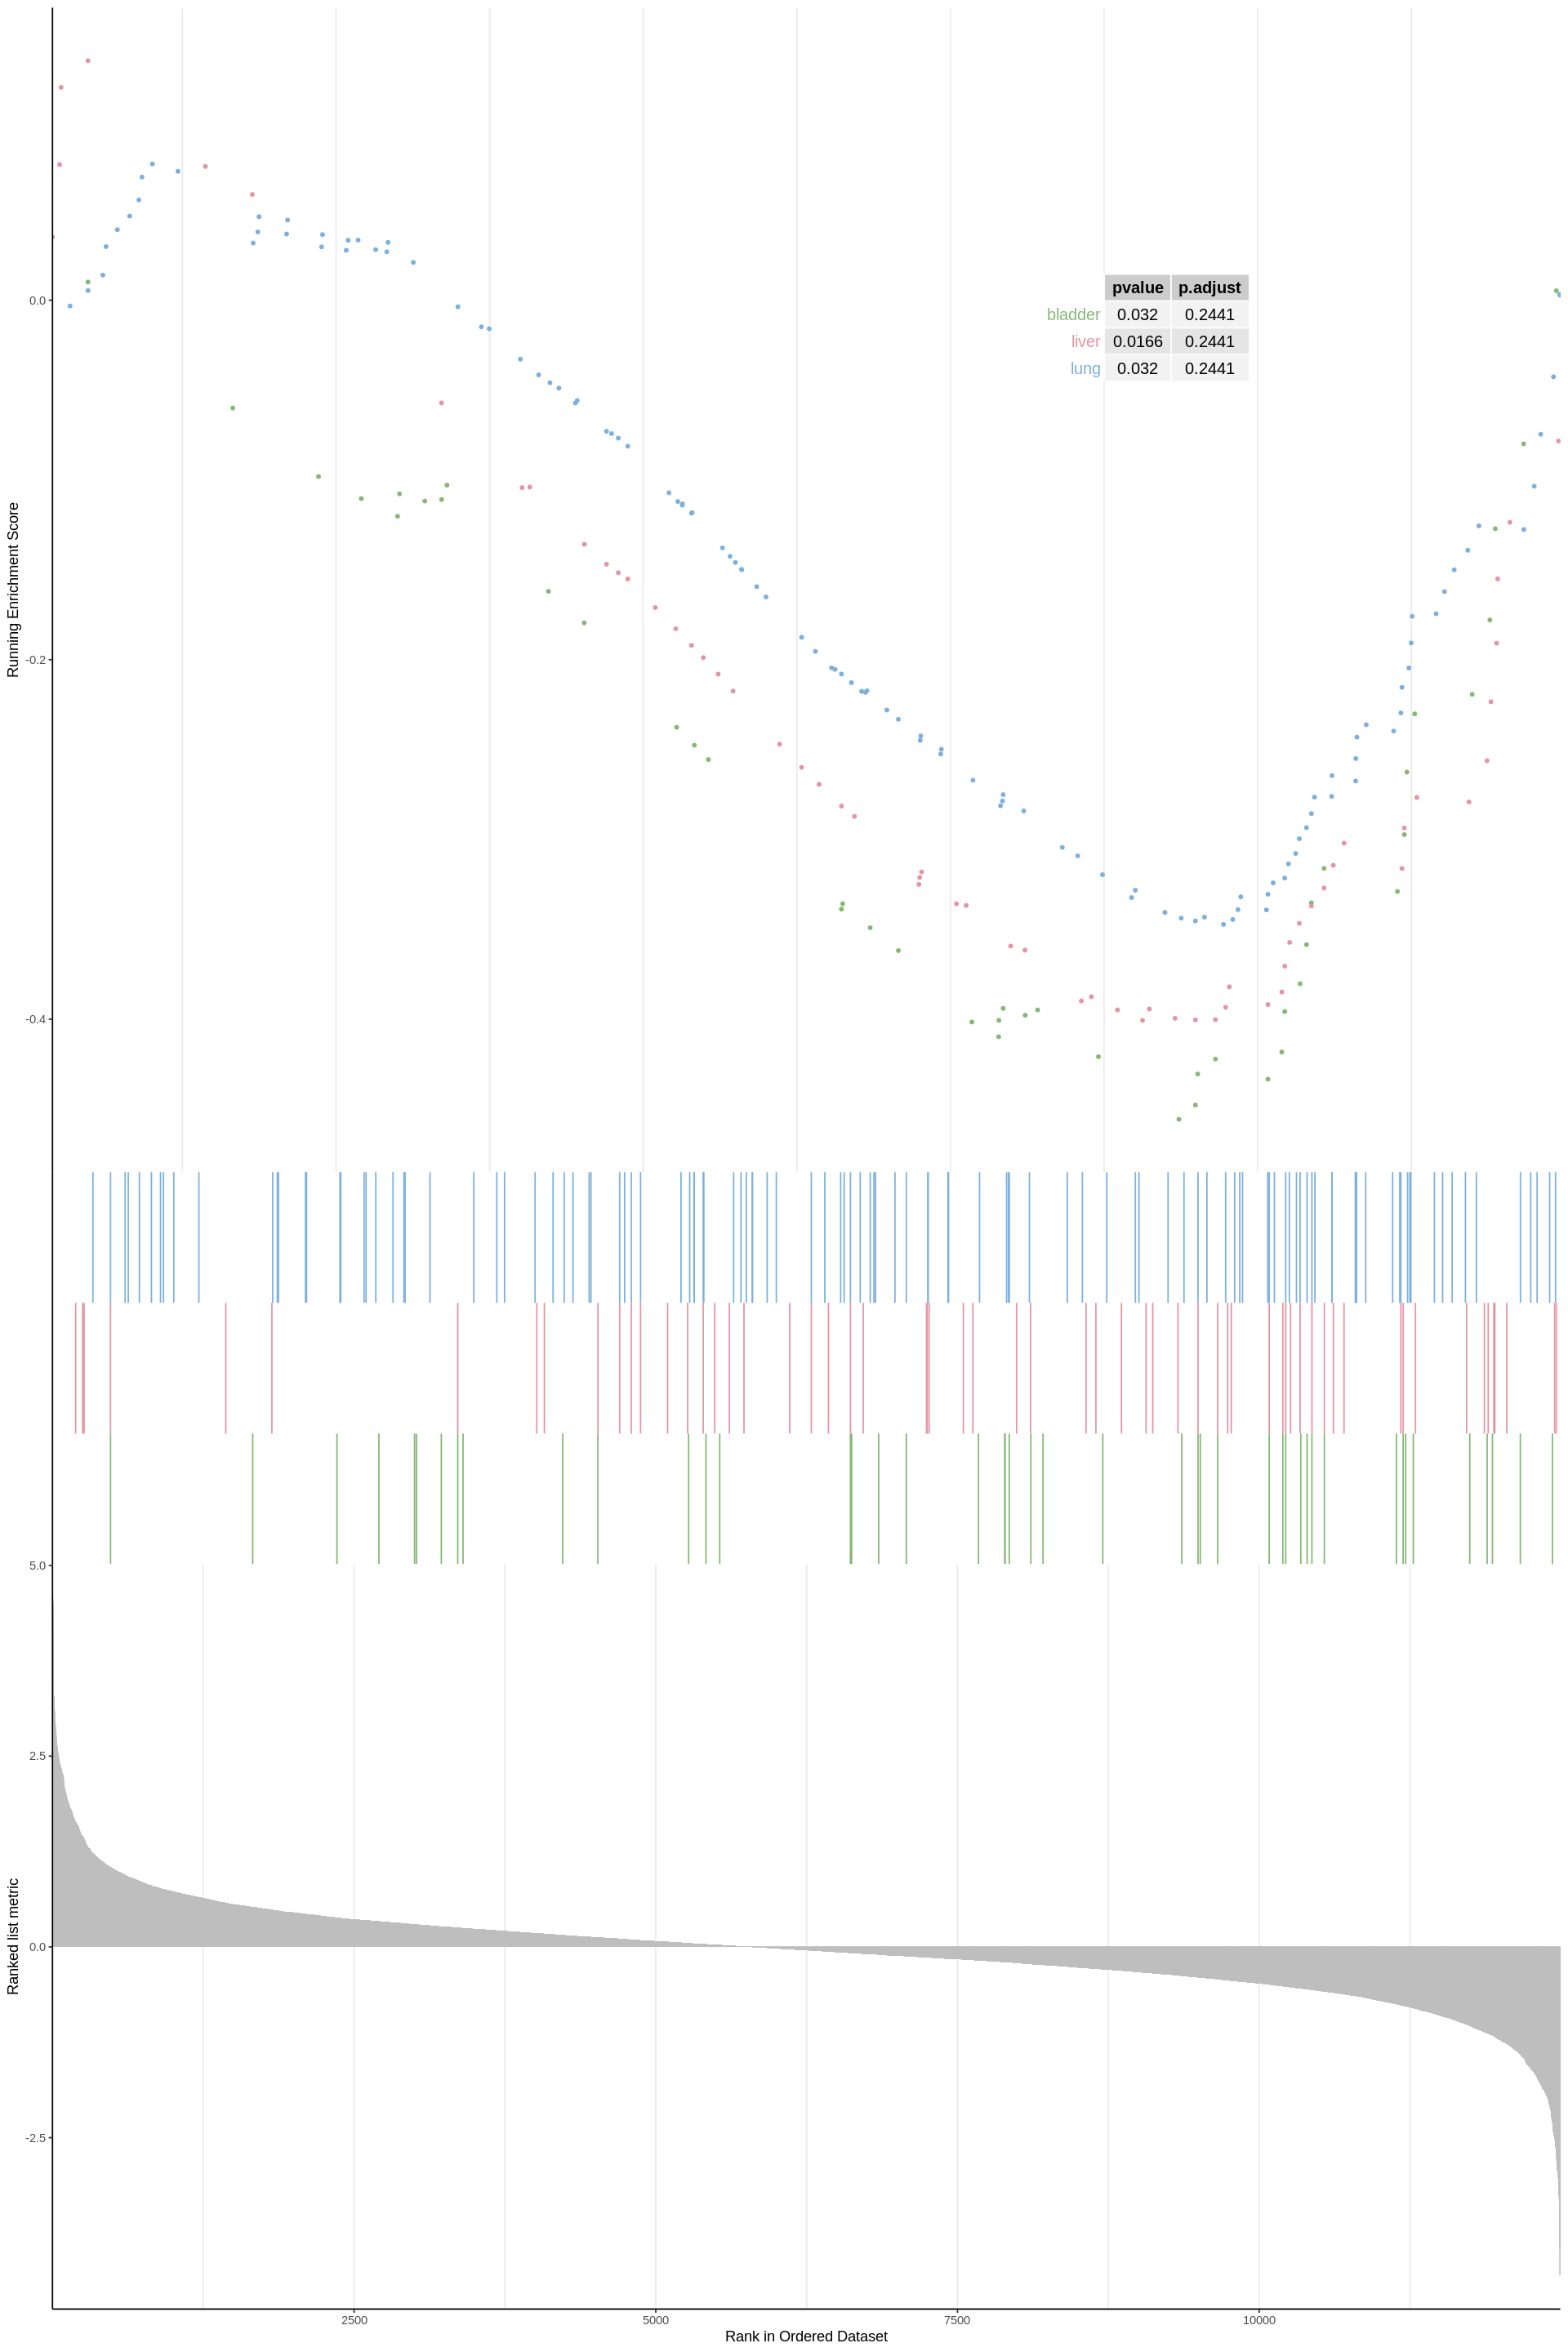

In [27]:
gseaplot2(edo2, geneSetID = 1:3, pvalue_table = TRUE,
          color = c("#E495A5", "#86B875", "#7DB0DD"), ES_geom = "dot")

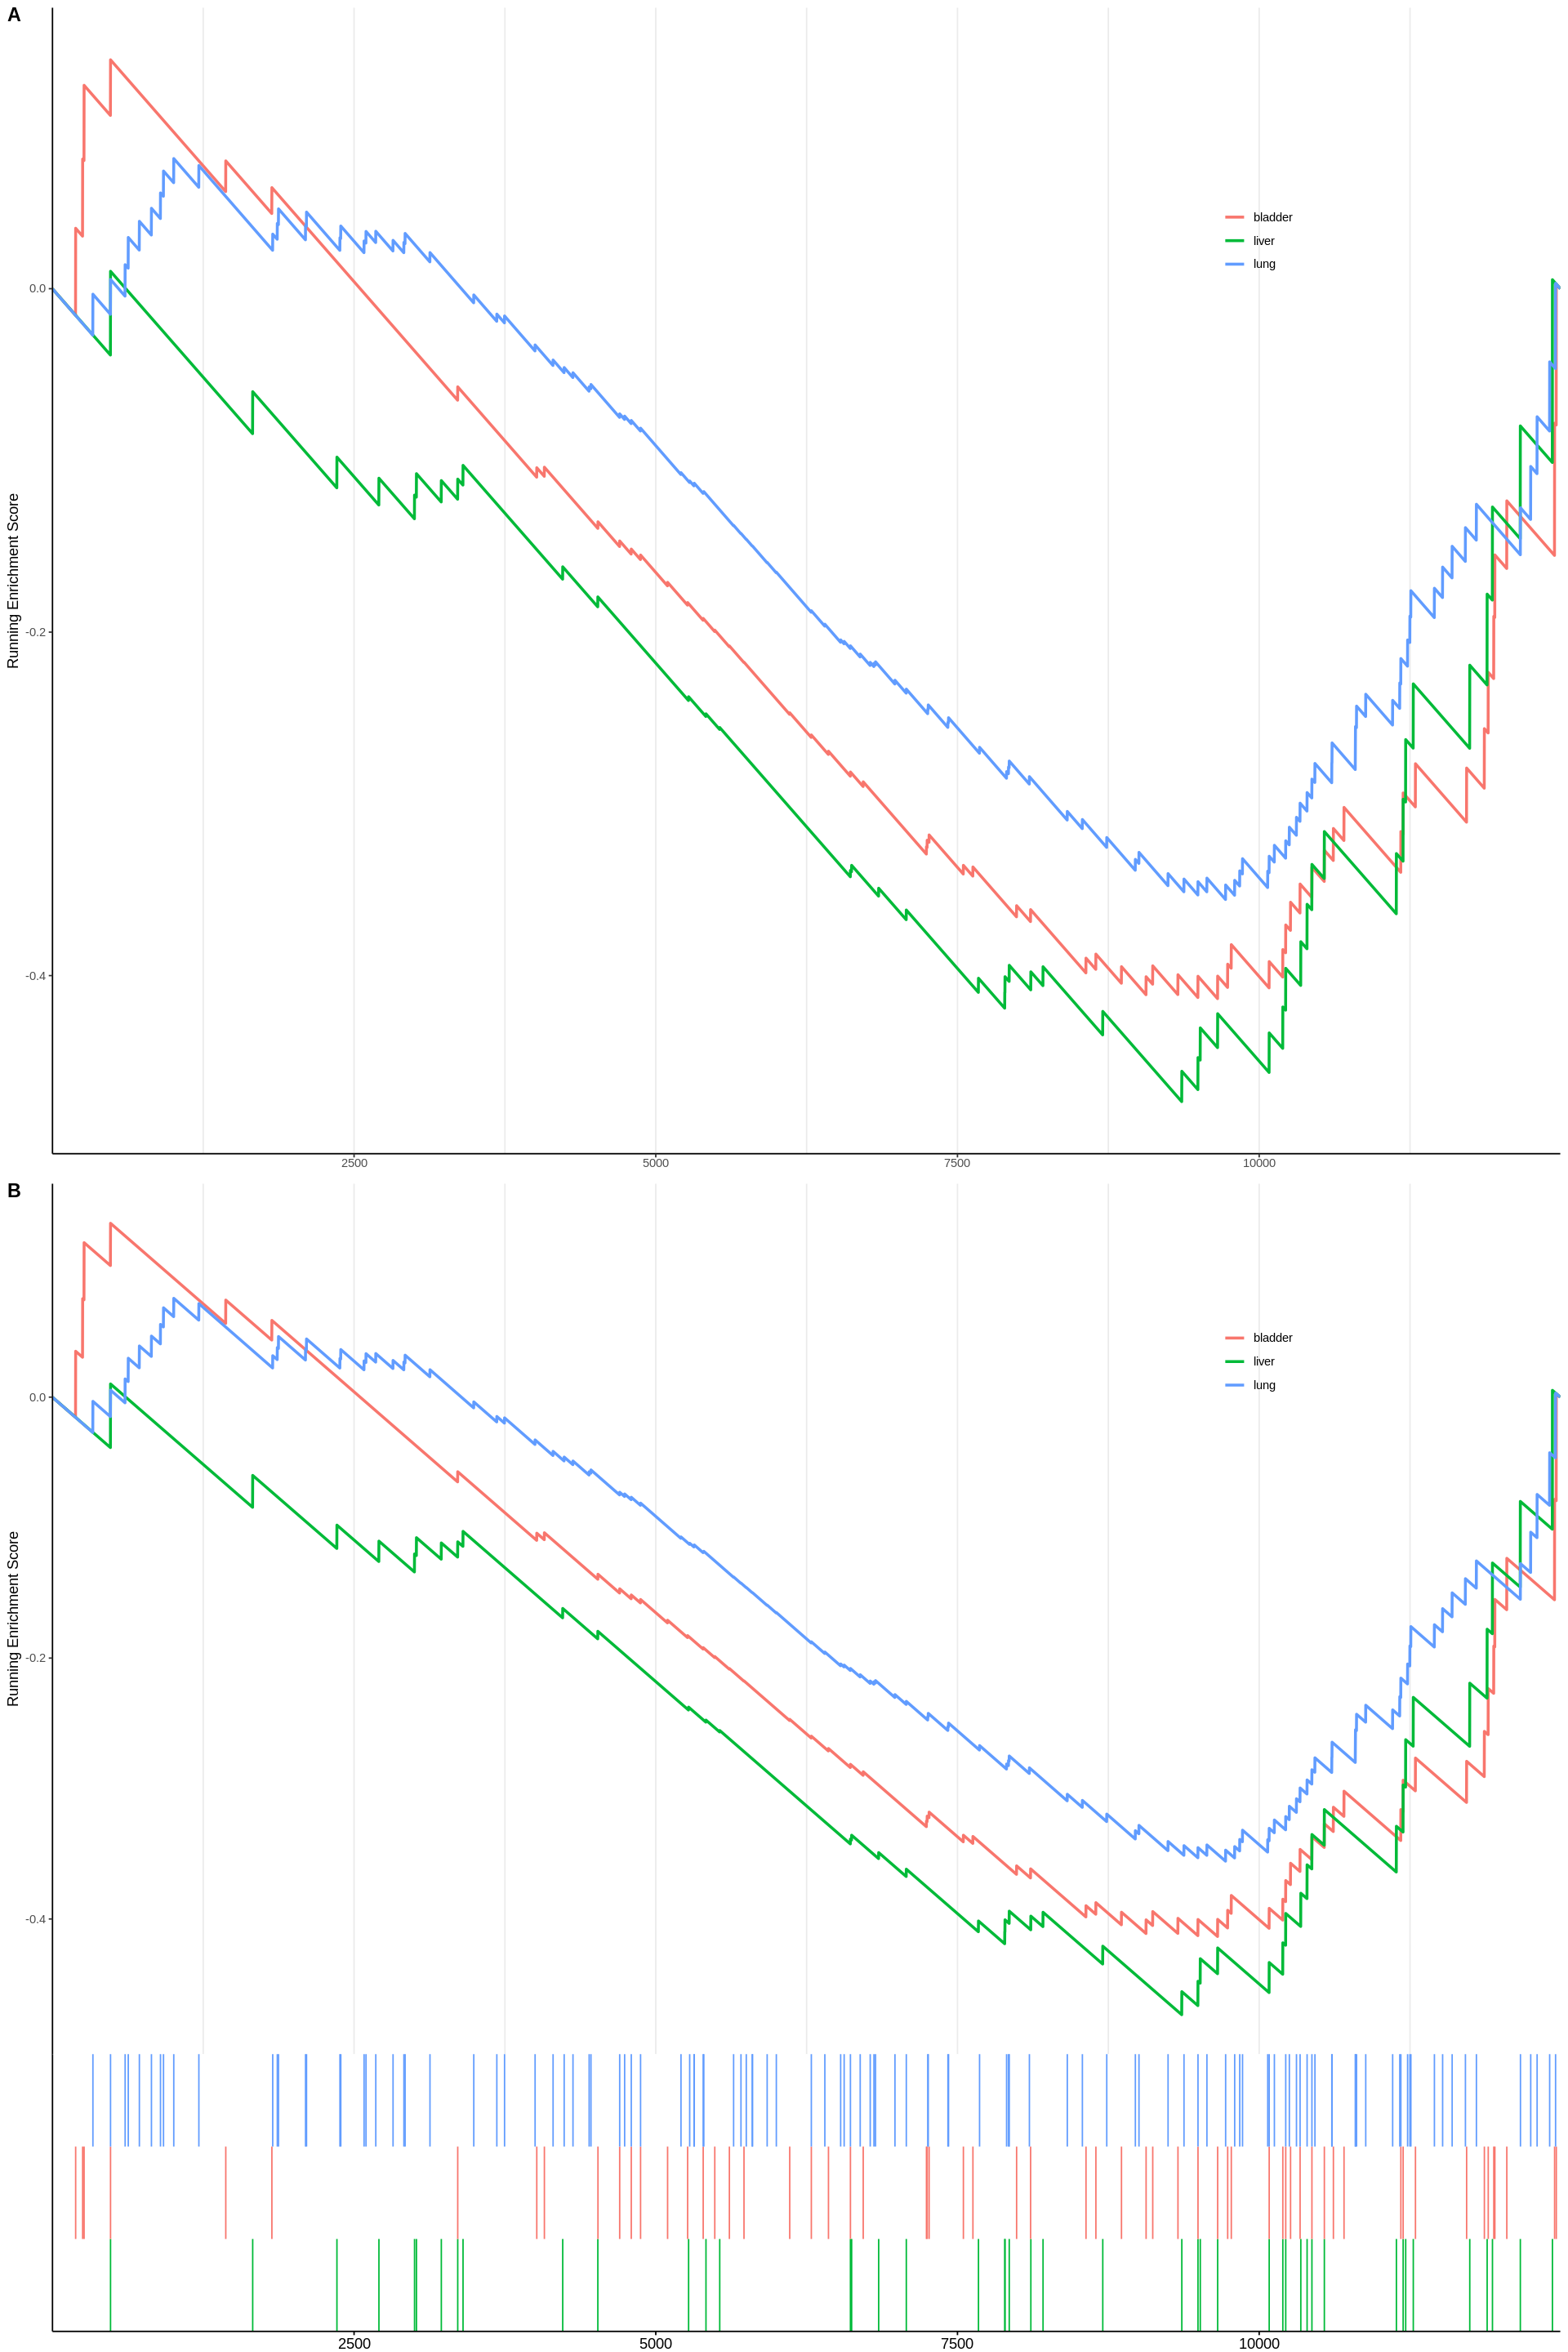

In [28]:
p1 <- gseaplot2(edo2, geneSetID = 1:3, subplots = 1)
p2 <- gseaplot2(edo2, geneSetID = 1:3, subplots = 1:2)
cowplot::plot_grid(p1, p2, ncol=1, labels=LETTERS[1:2])

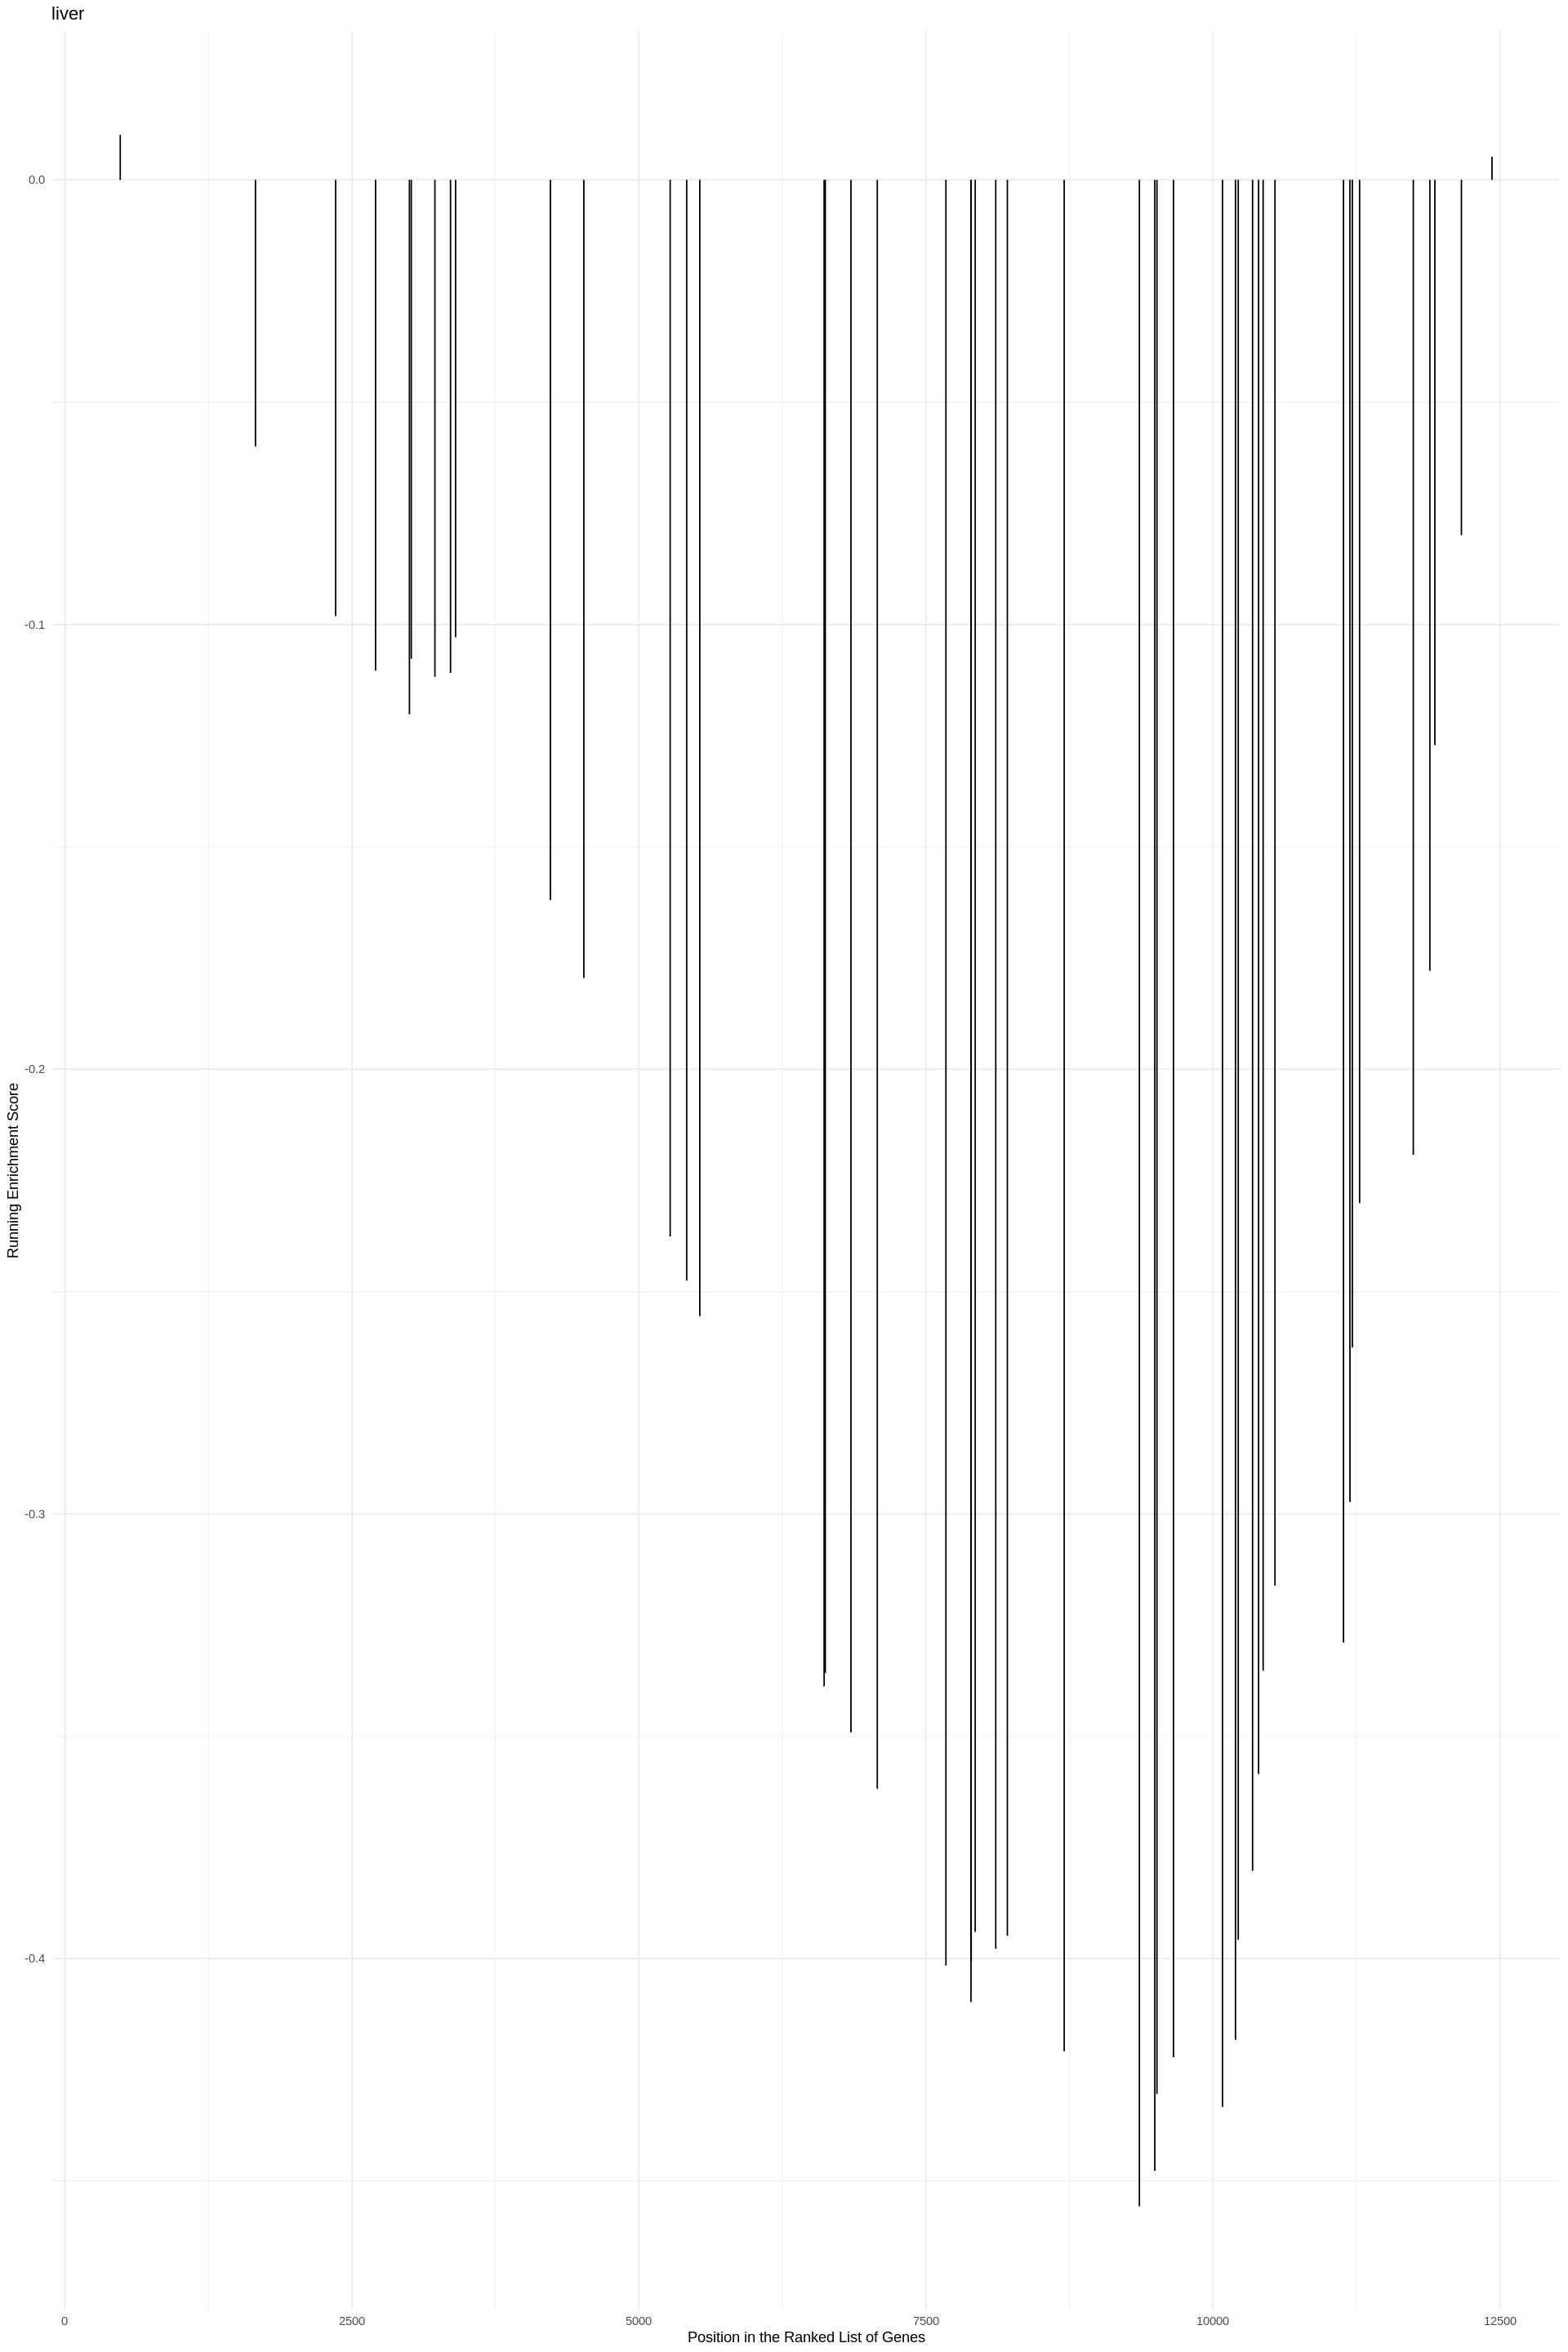

In [29]:
gsearank(edo2, 1, title = edo2[1, "Description"])

In [30]:
library(ggplot2)
library(cowplot)


********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************



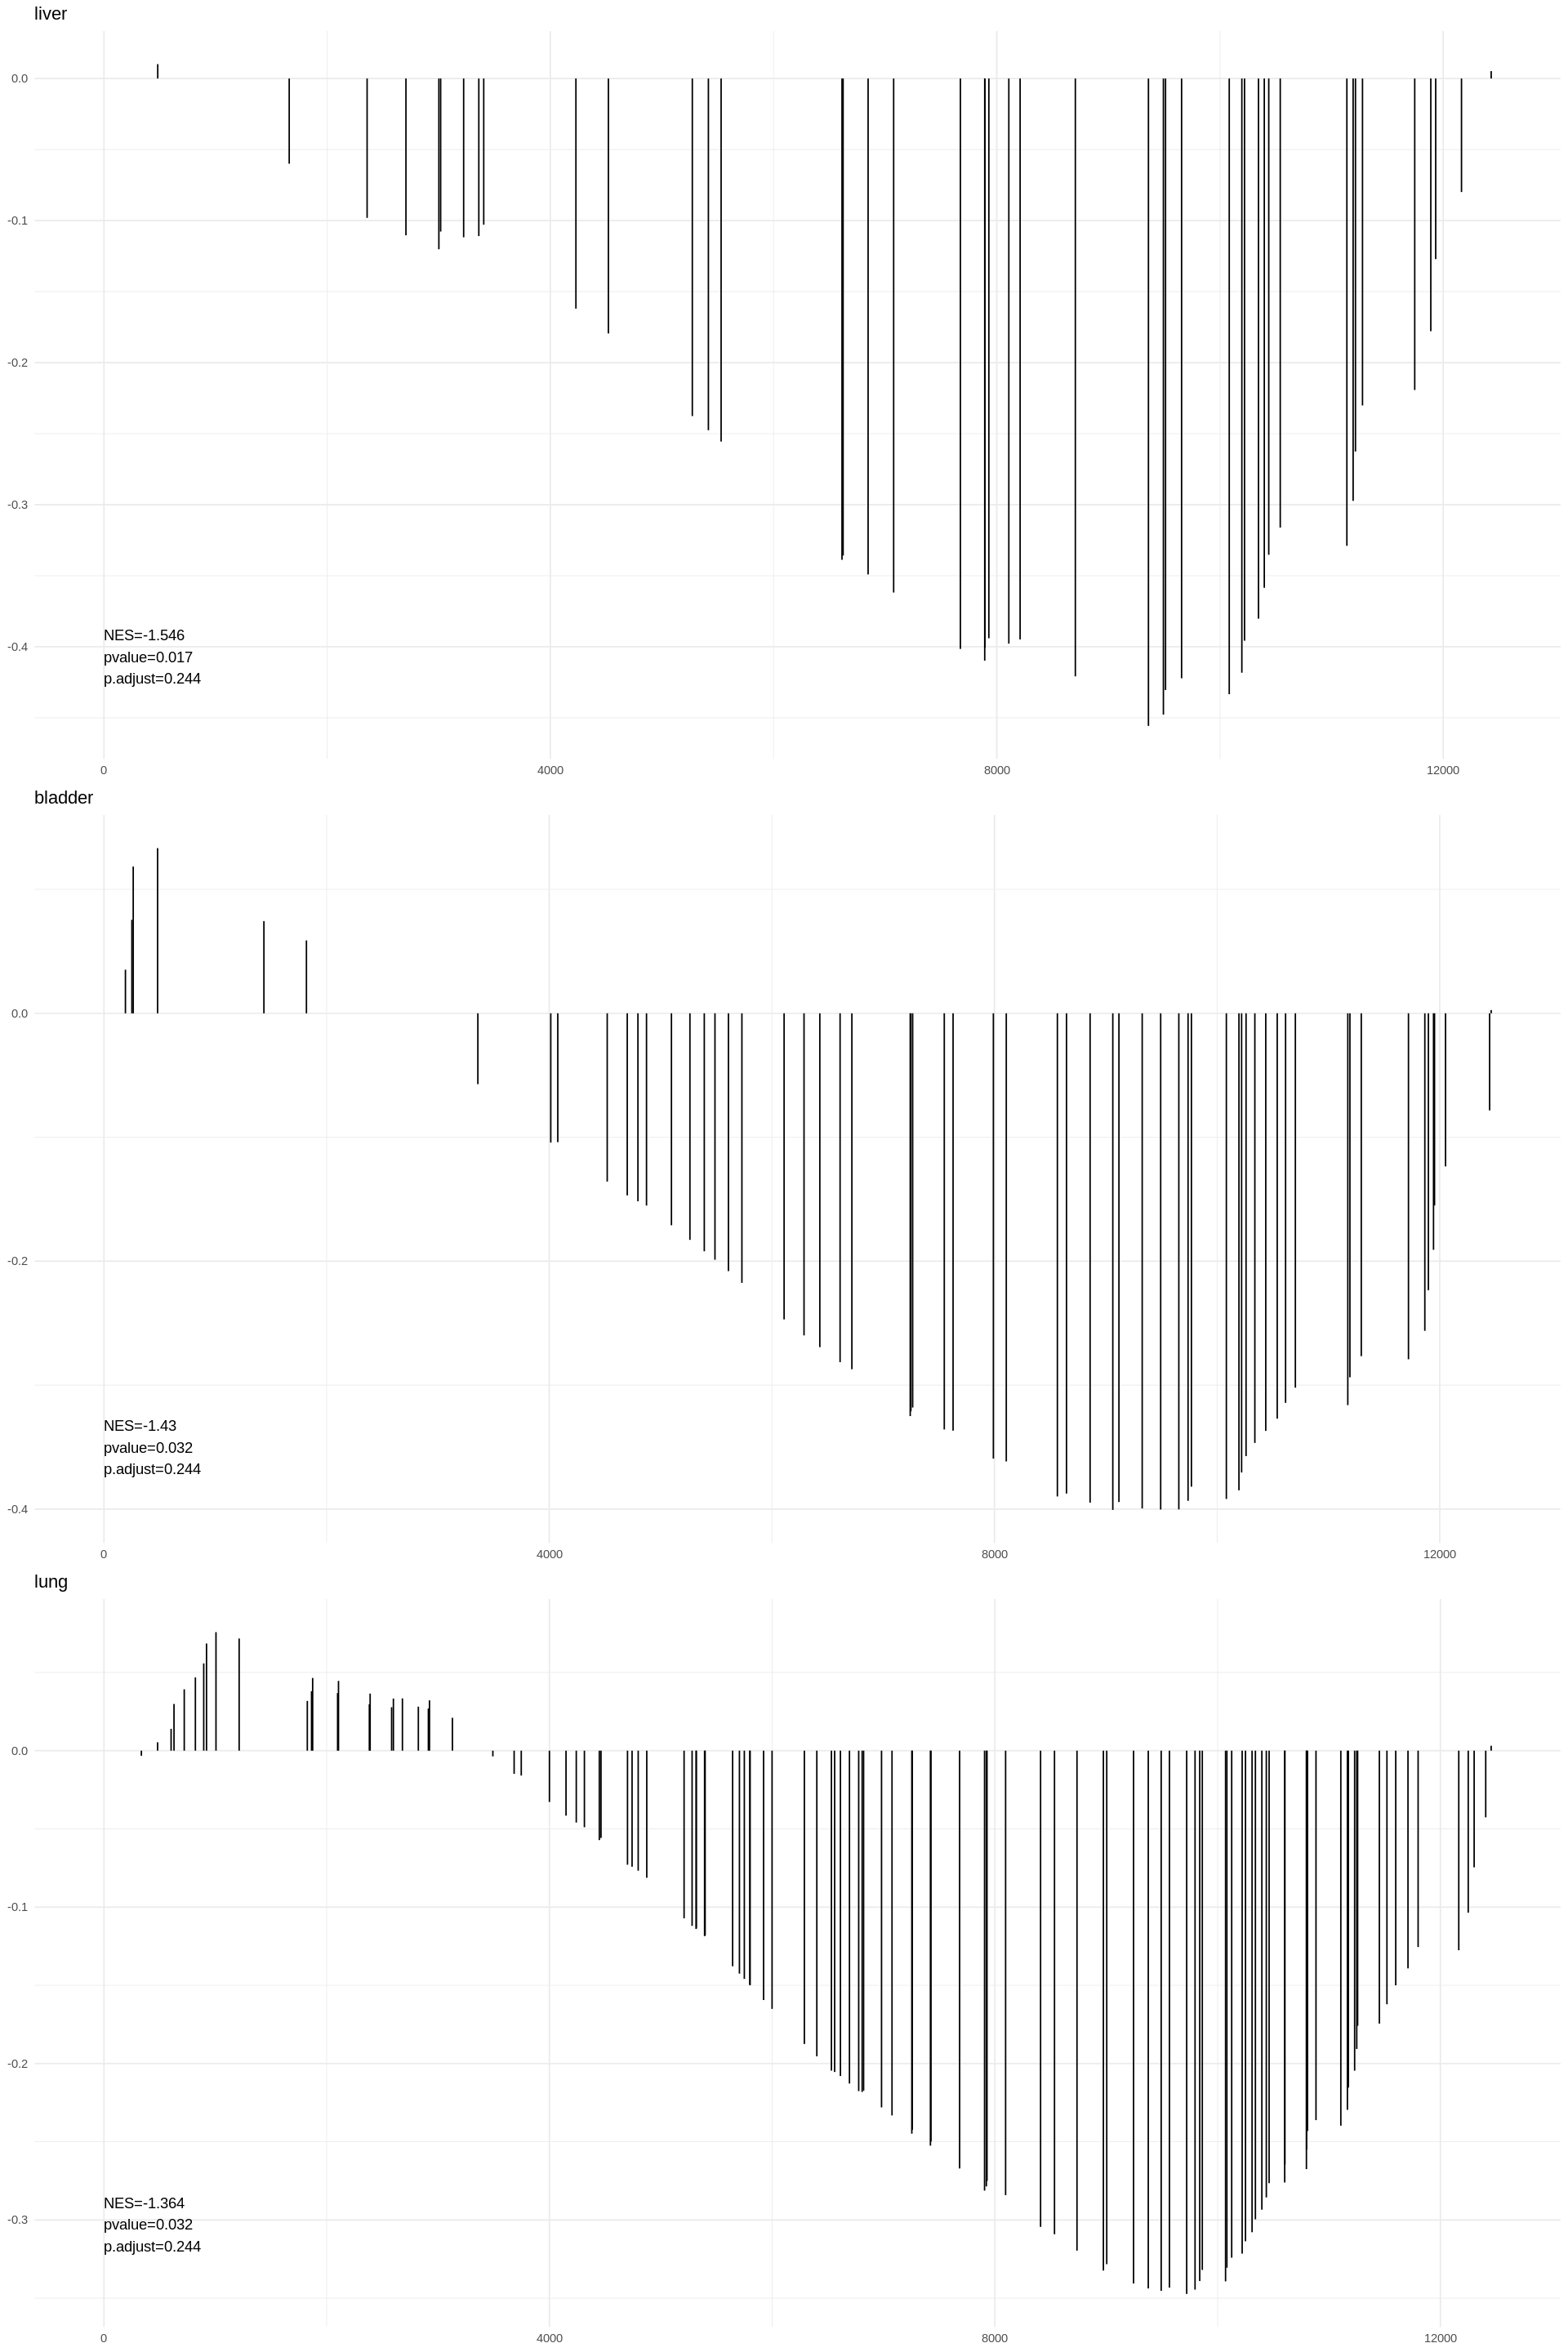

In [31]:
pp <- lapply(1:3, function(i) {
  anno <- edo2[i, c("NES", "pvalue", "p.adjust")]
  lab <- paste0(names(anno), "=",  round(anno, 3), collapse="\n")
  
  gsearank(edo2, i, edo2[i, 2]) + xlab(NULL) +ylab(NULL) +
    annotate("text", 0, edo2[i, "enrichmentScore"] * .9, label = lab, hjust=0, vjust=0)
})
plot_grid(plotlist=pp, ncol=1)

# 12.9 pubmed trend of enriched terms

Warning message:
“`as_data_frame()` is deprecated as of tibble 2.0.0.
Please use `as_tibble()` instead.
The signature and semantics have changed, see `?as_tibble`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”Warning message:
“`data_frame()` is deprecated as of tibble 1.1.0.
Please use `tibble()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”

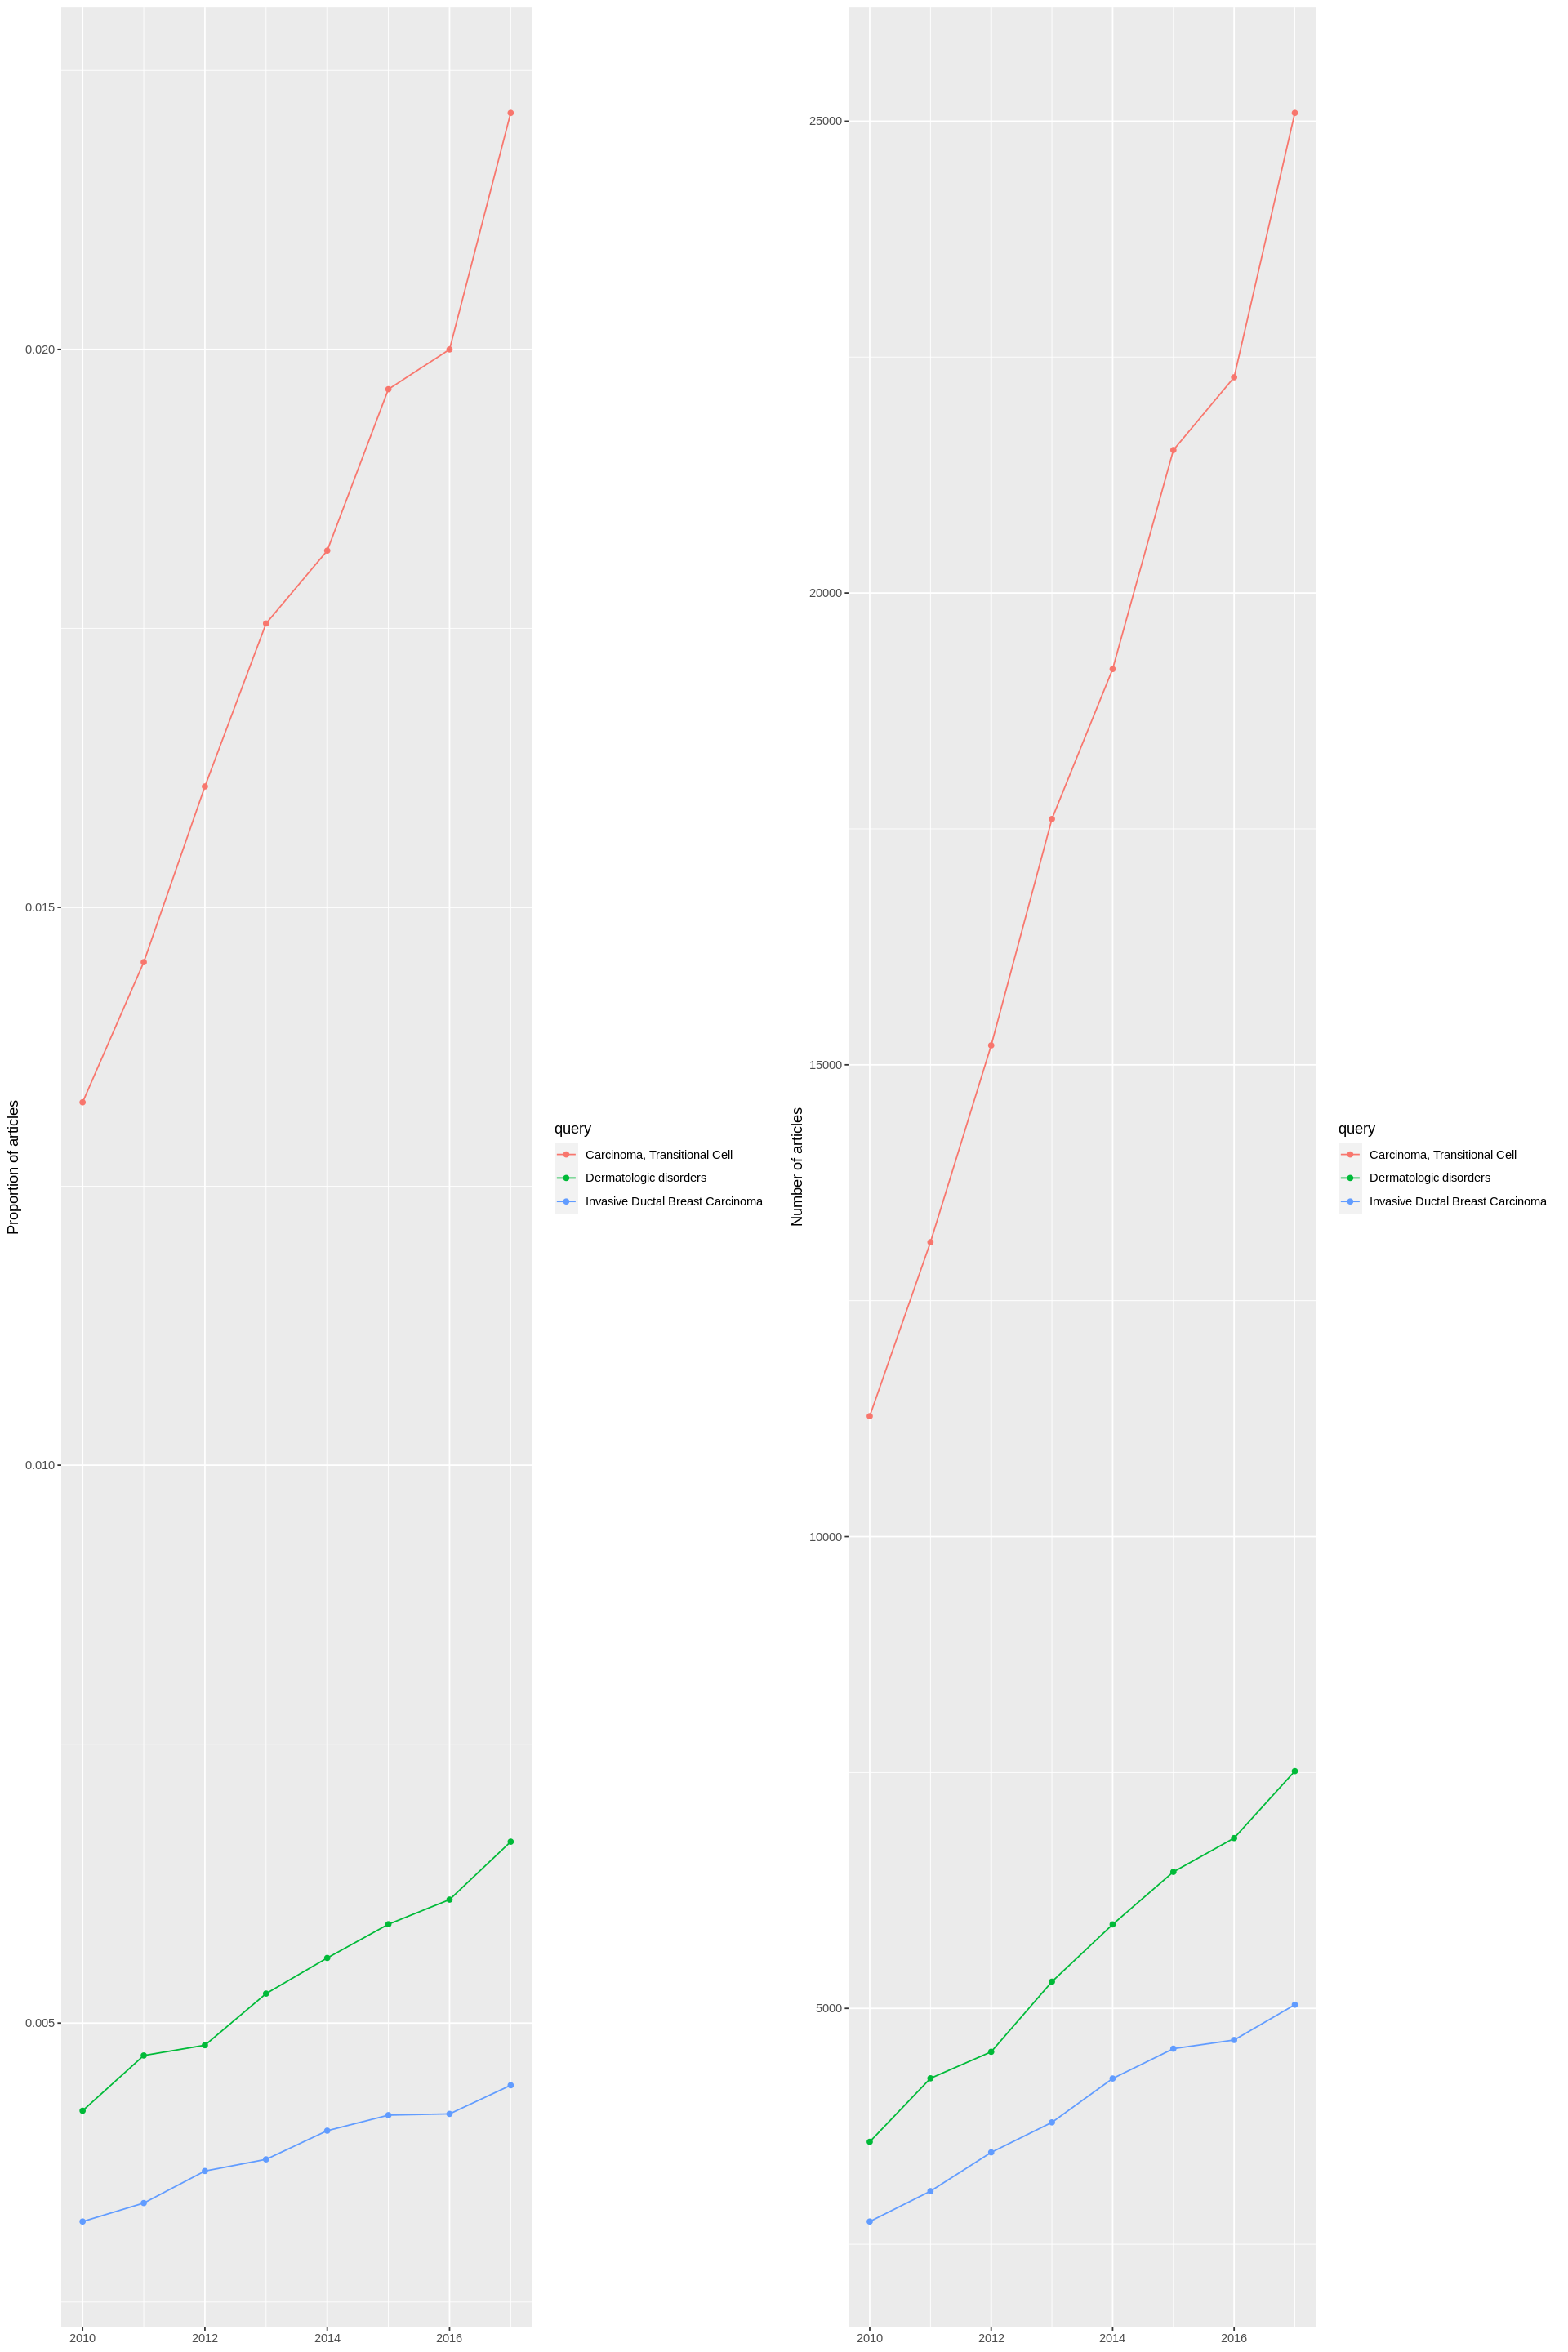

In [32]:
terms <- edo$Description[1:3]
p <- pmcplot(terms, 2010:2017)
p2 <- pmcplot(terms, 2010:2017, proportion=FALSE)
plot_grid(p, p2, ncol=2)

12.10 goplot
where is this ego? I don't find this. 

In [34]:
goplot(ego)

ERROR: Error in AnnotationDbi::mget(id, GOANCESTOR): use of NULL environment is defunct


# 12.11 browseKEGG
kk not found ???

In [35]:
browseKEGG(kk, 'hsa04110')

ERROR: Error in paste0("http://www.kegg.jp/kegg-bin/show_pathway?", pathID, "/", : object 'kk' not found


12.12 pathview from pathview package


In [36]:
library("pathview")
library("pathview")
hsa04110 <- pathview(gene.data  = geneList,
                     pathway.id = "hsa04110",
                     species    = "hsa",
                     limit      = list(gene=max(abs(geneList)), cpd=1))

##############################################################################
Pathview is an open source software package distributed under GNU General
Public License version 3 (GPLv3). Details of GPLv3 is available at
http://www.gnu.org/licenses/gpl-3.0.html. Particullary, users are required to
formally cite the original Pathview paper (not just mention it) in publications
or products. For details, do citation("pathview") within R.

The pathview downloads and uses KEGG data. Non-academic uses may require a KEGG
license agreement (details at http://www.kegg.jp/kegg/legal.html).
##############################################################################
Info: Downloading xml files for hsa04110, 1/1 pathways..
Info: Downloading png files for hsa04110, 1/1 pathways..
'select()' returned 1:1 mapping between keys and columns
Info: Working in directory /hpcdata/bcbb/yunhua/F20/tutorial/clusterProfiler0/notebooks
Info: Writing image file hsa04110.pathview.png
